##Importing necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

In [8]:
def nan_percentage(df):
  """
  Parameters: 
  df : pd.Dataframe : the dataframe that we want to check for Nan values
  Returns: None

  This function takes as an input a dataframe and creates barplots with the % percentage of NaN values for each column.
  """
  values=[]
  cols=[]
  for col in df.columns:
    if col not in ('month','year','hour_of_day','weekday','day_of_month'):
      values = values +([(df.isna()[col].sum()/len(df)*100).round(2)])
      cols.append(col)
  sns.color_palette("crest", as_cmap=True)
  plt.figure(figsize=(15,8))
  sns.barplot(x=values, y=cols, palette='rocket_r')
  plt.xticks(rotation=0)
  plt.xlabel("Percentage of missing values (%)")
  ##print(power_d.isna()[col].sum())


In [9]:
def nan_distribution(df):
  """
  Parameters: 
  df: pd.Dataframe : the dataframe that we want to check for nan's distribution
  datetime_list : list : a list with the datetime_parameters that we want in the x-axis
  
  Returns:None

  This function takes as an input a dataframe and creates barplots with its datetimes attributes(hour of day/month etc.). Here in order to see the distribution of the NaNs
  we give as an input the df that contains only True, False values ( True if the the respective value at the intial df is Nan and False otherwise.)


  """
  ## creating color palettes for our barplots

  for col in df.columns:
    if col not in ('month','year','weekday','day_of_month','hour_of_day'):
          fig, ax = plt.subplots(1,4)
          fig.set_size_inches(30, 5)
          plt.xticks(rotation=45)
          sns.barplot(x='month', y=col, data=df,ax=ax[0], palette='Set3',hue='year')
          sns.barplot(x='year', y=col, data=df,ax=ax[1])
          sns.barplot(x='hour_of_day', y=col, data=df,ax=ax[2], palette='Blues_r')
          sns.barplot(x='weekday', y=col, data=df,ax=ax[3],palette='gist_earth_r')


          plt.xticks(rotation=45)          



       

In [10]:
def missing_df(df):
  """
  Parameters: df :pd.DataFrame :the dataframe we want to process

  Returns df_missing :pd.DataFrame : the dataframe that is the copy of the input dataframe and also has columns for each column to show whether the relevant column's data is NaN
 
 """
  df_missing=df.copy()
  for col in df.columns:
    if col not in ('year','month','weekday','hour_of_day','day_of_month'): ## we exclude these columns as we know there no missing values there
      df_missing["Missing " + col]=df.isna()[col]
      df_missing=df_missing.drop(columns=col, axis=1)
  return df_missing

In [11]:
def select_range(df):
  """
  Parameters: df : pd.Dataframe : the dataframe that we want to check for missing datetime values

  Returns : df : pd.Dataframe : the inserted dataframe with its index starting from '2021-08-01 00:00:00'and ending to the current datetime minus 5 days)
"""
  df=df.loc['2021-08-01 00:00:00':bring_current_datetime_minus5()]
  return df

In [249]:
def bring_current_datetime_minus5():
  """
  Parameters: None

  Returns: dt_string : string :the current datetime minus 5 days
  """
  from datetime import datetime, timedelta

  # datetime object containing current date and time
  now = datetime.now()
  now = now - timedelta(days=5)
  
 
  # YY-mm-dd H:M:S format
  dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
  return dt_string

In [250]:
def create_countplots_for_negative_pf(df,col):
  y = ['weekday','hour_of_day']

  for x in y:
     fig, ax = plt.subplots(1,1)

     fig.set_size_inches(8, 4)
     plt.xticks(rotation=45)
     sns.countplot(df[df[col]<0][x]) 
     percentage = math.ceil((len(df[df[col]<0])/len(df))*100)

  print( percentage, '% of', col, 'is negative')

In [251]:
import math

In [252]:
def create_countplots_for_positive_pf(df,col):
  y = ['weekday','hour_of_day']

  for x in y:
     fig, ax = plt.subplots(1,1)

     fig.set_size_inches(8, 4)
     plt.xticks(rotation=45)
     sns.countplot(df[df[col]>0][x])
     percentage = math.ceil((len(df[df[col]>0])/len(df))*100)

  print( percentage, '% of', col, 'is positive')

In [253]:
def create_barplots(df,col):
  y = ['weekday','hour_of_day']

  for item in y:
     fig, ax = plt.subplots(1,1)

     fig.set_size_inches(8, 4)
     plt.xticks(rotation=45)
     sns.barplot(data=df, y=col ,x=item)



In [254]:
def create_correlation_mtrx(df):
  corr_matrix = df.corr()
  plt.figure(figsize=(30,15))
  sns.heatmap(corr_matrix,annot=True)

In [255]:
def impute(ts: pd.DataFrame,
           max_thr: int = 288,
           a: float = 0.3,
           wncutoff: float = 0.000694,
           ycutoff: int = 3,
           ydcutoff: int = 30,
           resolution: str = "5",
           debug: bool = False):
    """
    Reads the input dataframe and imputes the timeseries using a weighted average of historical data
    and simple interpolation. The weights of each method are exponentially dependent on the distance
    to the nearest non NaN value. More specifficaly, with increasing distance, the weight of
    simple interpolation decreases, and the weight of the historical data increases. If there is
    a consecutive subseries of NaNs longer than max_thr, then it is not imputed and returned with NaN
    values.
    Parameters
    ----------
    ts
        The pandas.DataFrame to be processed
    max_thr
        If there is a consecutive subseries of NaNs longer than max_thr,
        then it is not imputed and returned with NaN values
    a
        The weight that shows how quickly simple interpolation's weight decreases as
        the distacne to the nearest non NaN value increases
    wncutoff
        Historical data will only take into account dates that have at most wncutoff distance
        from the current null value's WN(Week Number)
    ycutoff
        Historical data will only take into account dates that have at most ycutoff distance
        from the current null value's year
    ydcutoff
        Historical data will only take into account dates that have at most ydcutoff distance
        from the current null value's yearday
    re    debug
        If true it will print helpfull intermediate results
    Returns
    -------
    pandas.DataFrame
        The imputed dataframe
    """

    #Returning calendar of the country ts belongs to
    from datetime import datetime,timedelta
    for col in ts.columns:
      if col not in ('month','year','weekday','day_of_month','hour_of_day'):
        imputed_values = ts[ts[col].isnull()]


        #null_dates: Series with all null dates to be imputed
        null_dates = imputed_values.index
        d = [len(null_dates) for _ in range(len(null_dates))]


        if debug:
            for date in null_dates:
                print(date)

        #isnull: An array which stores whether each value is null or not
        isnull = ts[col].isnull().values

        #d: List with distances to the nearest non null value
        d = [len(null_dates) for _ in range(len(null_dates))]

        #leave_nan: List with all the values to be left NaN because there are
        #more that max_thr consecutive ones
        leave_nan = [False for _ in range(len(null_dates))]

        #Calculating the distances to the nearest non null value that is earlier in the series
        count = 1
        for i in range(len(null_dates)):
            d[i] = min(d[i], count)
            if i < len(null_dates) - 1:
              next=(datetime.strptime(null_dates[i+1], '%Y-%m-%d %H:%M:%S')).strftime("%Y-%m-%d %H:%M:%S")
              current_plus5=((datetime.strptime(null_dates[i], '%Y-%m-%d %H:%M:%S'))+timedelta(minutes=5)).strftime("%Y-%m-%d %H:%M:%S")
              if next == current_plus5:
                    count += 1
              else:
                    count = 1

        #Calculating the distances to the nearest non null value that is later in the series
        count = 1
        for i in range(len(null_dates)-1, -1, -1):
            d[i] = min(d[i], count)
            if i > 0:
              previous=(datetime.strptime(null_dates[i-1], '%Y-%m-%d %H:%M:%S')).strftime("%Y-%m-%d %H:%M:%S")
              current_minus5=((datetime.strptime(null_dates[i], '%Y-%m-%d %H:%M:%S'))-timedelta(minutes=5)).strftime("%Y-%m-%d %H:%M:%S")
              if current_minus5==previous:
                    count += 1
              else:
                    count = 1

        #If d[i] >= max_thr // 2, that means we have a consecutive subseries of NaNs longer than max_thr.
        #We mark this subseries so that it does not get imputed
        for i in range(len(null_dates)):
            if d[i] == max_thr // 2:
                for ii in range(max(0, i - max_thr // 2 + 1), min(i + max_thr // 2, len(null_dates))):
                    leave_nan[ii] = True
            elif d[i] > max_thr // 2:
                leave_nan[i] = True

        #This is the interpolated version of the time series
        ts_interpolated = ts[col].interpolate(inplace=False)

        #We copy the time series so that we don't change it while iterating
        res = ts.copy()
        for i, null_date in enumerate(null_dates):
          if leave_nan[i]: continue
          res.loc[null_date][col] = ts_interpolated.loc[null_date]


    return res


In [256]:
def create_hists(df):

  for col in df.columns: 
    if col not in ('month','weekday','day_of_month','hour_of_day','year'):
      df.hist(column=col, bins=50, figsize=(12,8))


In [257]:
def create_power_plots(df,start_date, end_date):
  """ 
  Parameters : df : pd.Dataframe : the dataframe that contains the column we want to plot
    start_date : str : the starting date of the plot
    end_date : str : the finishing date of the plot
    col : str : the name of the column that contains the values we want to plot

  """
  plt.figure(figsize=(30,15))

  for col in df.columns:
    if col in ('active_w2','active_w3','active_w4','active_w5','active_w6'):

        df[start_date:end_date][col].plot(linewidth=4)
        plt.xticks(rotation=45)
        plt.legend(bbox_to_anchor=(1.1, 1.05)) 

plt.show()


In [259]:
def create_plots(df,start_date, end_date, column =None):
  """ 
  Parameters : df : pd.Dataframe : the dataframe that contains the column we want to plot
    start_date : str : the starting date of the plot
    end_date : str : the finishing date of the plot
    col : str : the name of the column that contains the values we want to plot

  """
  plt.figure(figsize=(25,10))
  
  if column is not None:
    df[start_date:end_date][column].plot(linewidth=4)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.1, 1.05)) 
  else :
      for col in df.columns:
        if col not in ('month','year','hour_of_day','weekday','day_of_month'):

          df[start_date:end_date][col].plot(linewidth=4)
          plt.xticks(rotation=45)
          plt.legend(bbox_to_anchor=(1.1, 1.05)) 
  plt.show()



and then import the csvs we have already saved


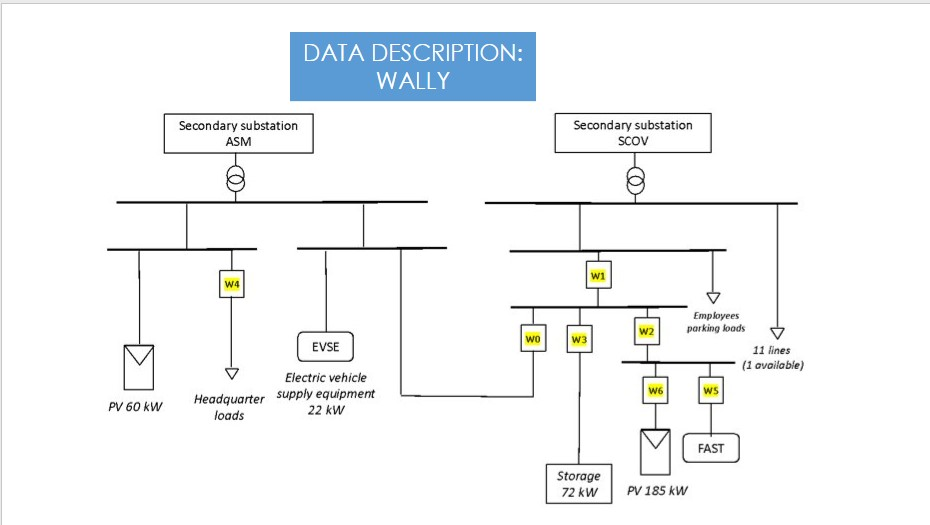

In [205]:
power_dt=pd.read_csv("power_dt.csv")
voltage_dt=pd.read_csv("voltage_dt.csv")
current_dt=pd.read_csv("current_dt.csv")

In [206]:
power_dt=power_dt.rename(columns={'Unnamed: 0':'index'}).set_index('index')
current_dt=current_dt.rename(columns={'Unnamed: 0':'index'}).set_index('index')
voltage_dt=voltage_dt.rename(columns={'Unnamed: 0':'index'}).set_index('index')


#Checking the distribution of NaN values across the dataframes of power, current and voltage

## Percentage of missing values 

To get a first overview of the missing values /variable/ meter we use the nan_percentage function. The percentage of missing values for every meter's component is as follows: 

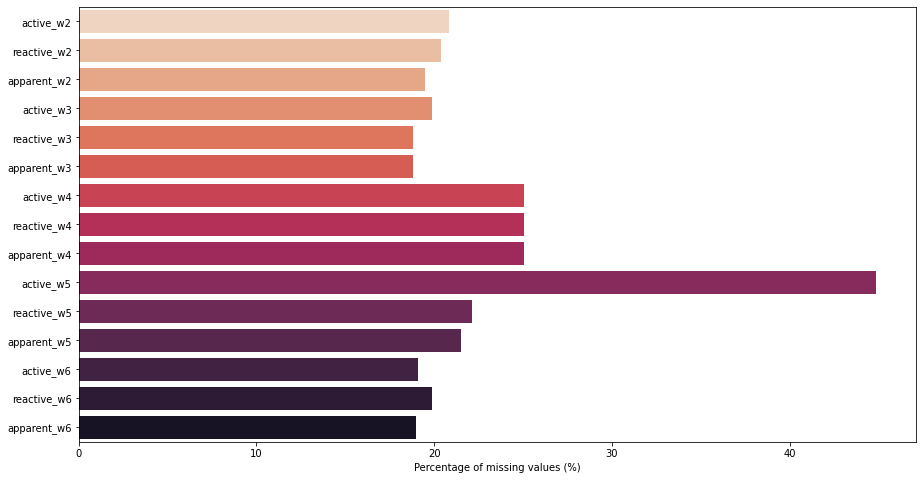

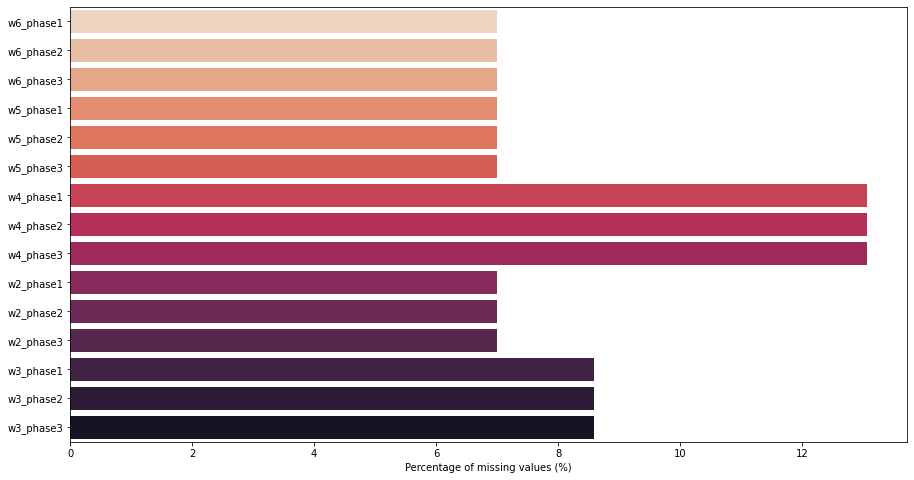

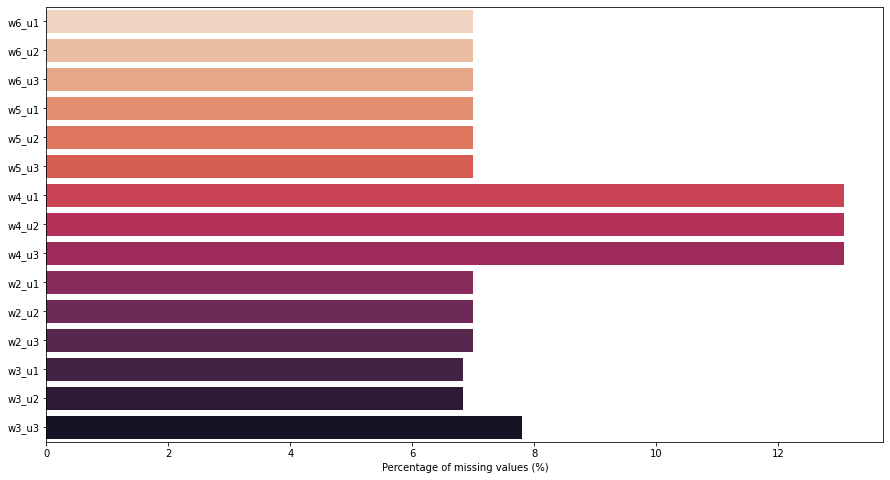

In [47]:
nan_percentage(power_dt)
nan_percentage(current_dt)
nan_percentage(voltage_dt)

As we can see from the above barplots the meter with the highest percentage of Nan values for current and voltage data is w4, with approximately 13% of its values missing while for power data the 45% approximately of w5's active power is missing, followed by 25% of w4's power missing.


The percentages are very high. We have to consider that we have indexed our dataframes from 2022-07-1 till now, and the live data are not updating this fast, so the past 5 days, which means (288 5 minute intervals a day *5 days = 1440 data) about 1% of our data is missing due to this. 

Note: W5 corresponds to the smart meter connected to the fast charging station
W4 corresponds to the smart meter connected to the headquarters loads




##Missing values per datetime attributes (month, day, etc)

By calling the missing_df function on our dfs, we get the relevant "missing" dataframes that have a True value if the corresponding value of the initial df is NaN and False otherwise.


In [282]:
missing_power =missing_df(power_dt)
missing_current=missing_df(current_dt)
missing_voltage= missing_df(voltage_dt)

We create barplots to see the distribution of NaN values across the different datetime attributes. We get four barplots for each meter's component:  % Nan / month, 2) %NaN /year, 3)%NaN /the hour of the day, 4)%NaN / weekday

####For power data

In [280]:
nan_distribution(missing_power)


NameError: ignored

From the above barplots for missing data for power, we understand that :     

*  Missing values are almost equally distributed among the hours of the day and the weekdays 

*   For 2021 measurements, we miss July entirely and approximately 20% of August

*   For 2022 measurements,
    1) we miss 90-100% of July and August, and 20% of October for all meters
    2) for the connected to headquarter loads meter (w4) we miss almost all of May's measurements and about 20% of April's
    3) for the connected to the fast charging station smart meter ( w5) from September to December we miss 100% of its active power's data and about 10-20 % of its apparent and reactive.

*   For 2023 measurements,for January ( we don't take into consideration the february for now, as it is still 15/02) we miss 100% of w5's active power and about 20% of its apparent and reactive power. Also approximately 10 % of w2's active and reactive power is missing.

So the mass percentage of the missing values comes from the summer months for both 2021 and 2022.
Regarding the meter at the headquarter loads something caused the meter not to measure from April to May 2022.
Regarding W5 meter it looks like it has stopped measuring the active power since July 2022.

#### For current data

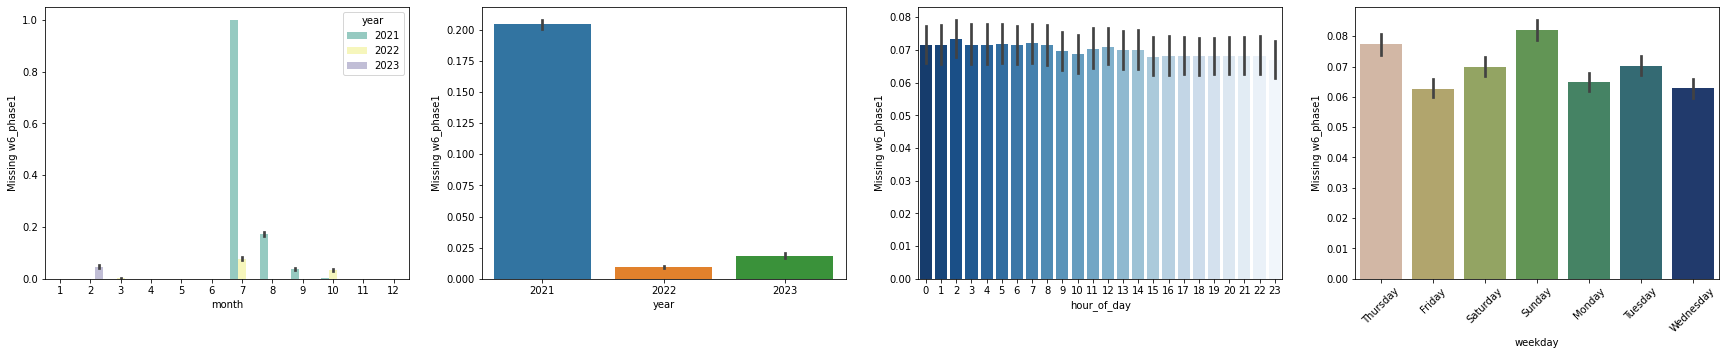

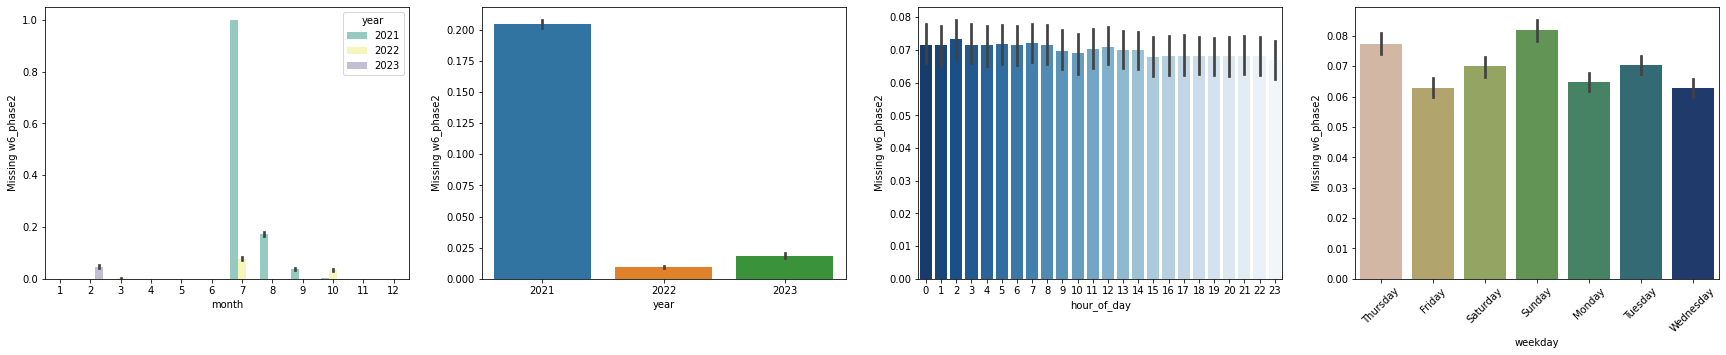

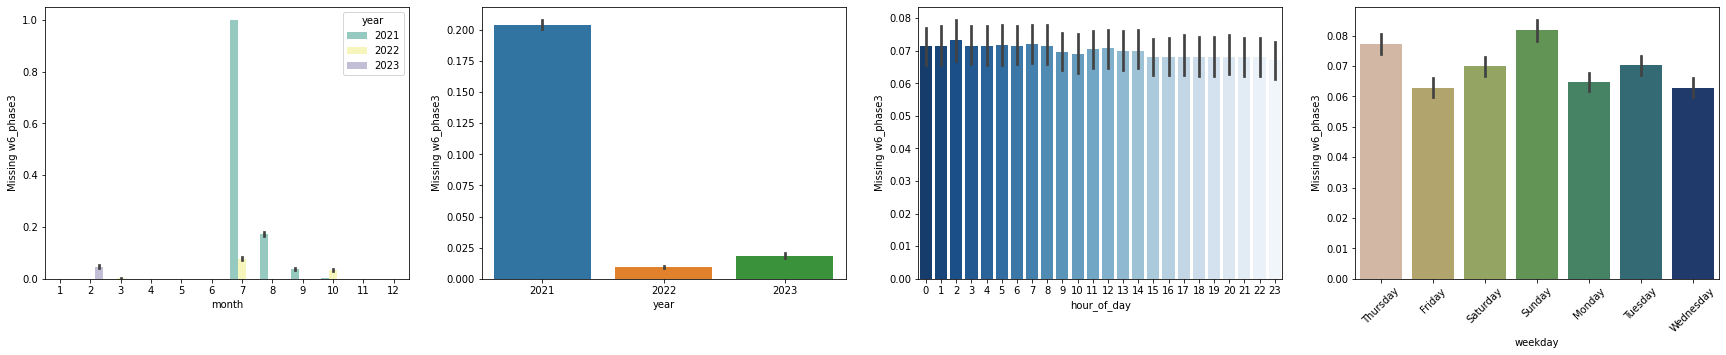

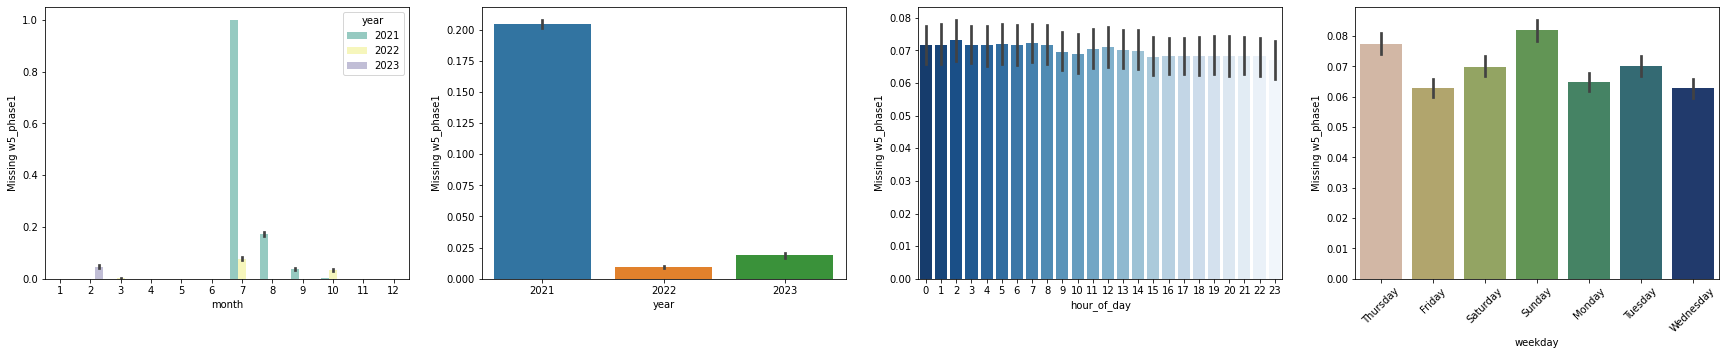

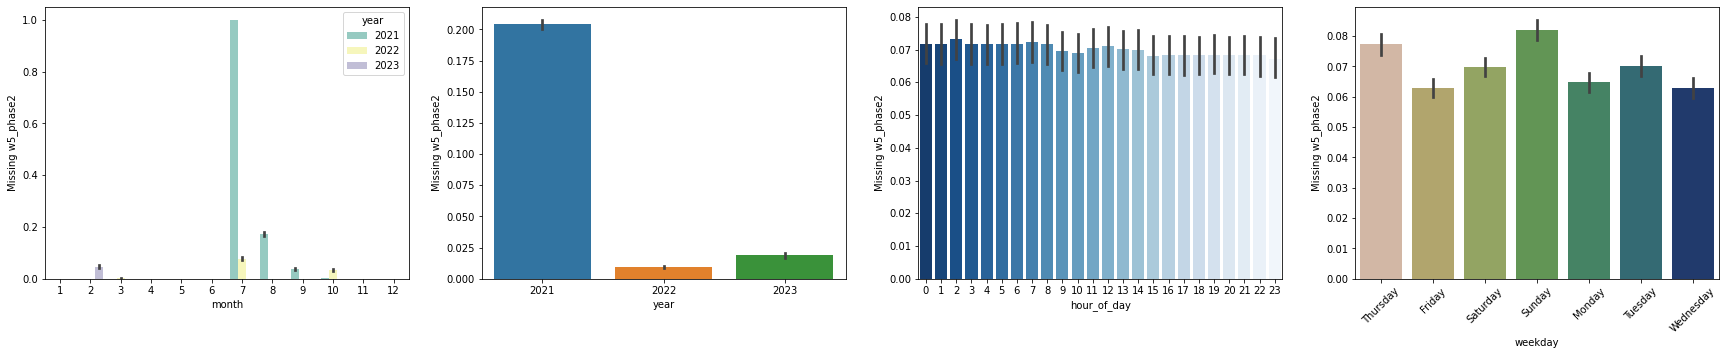

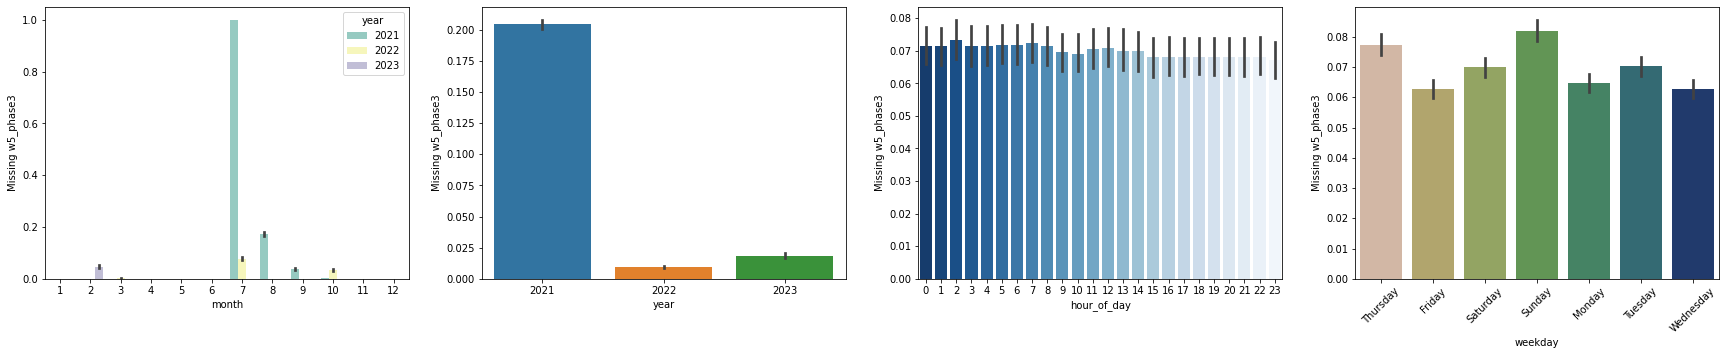

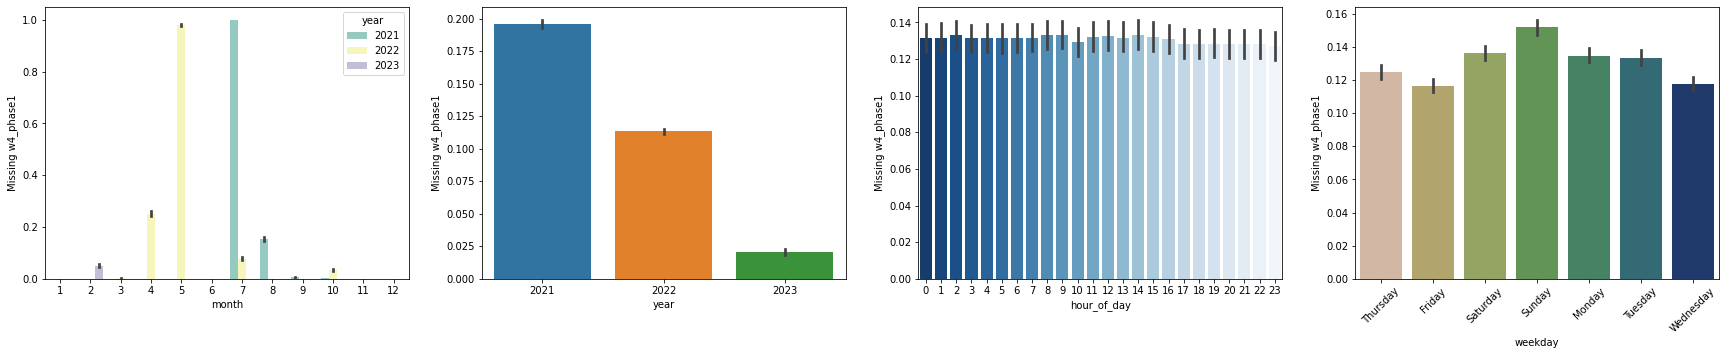

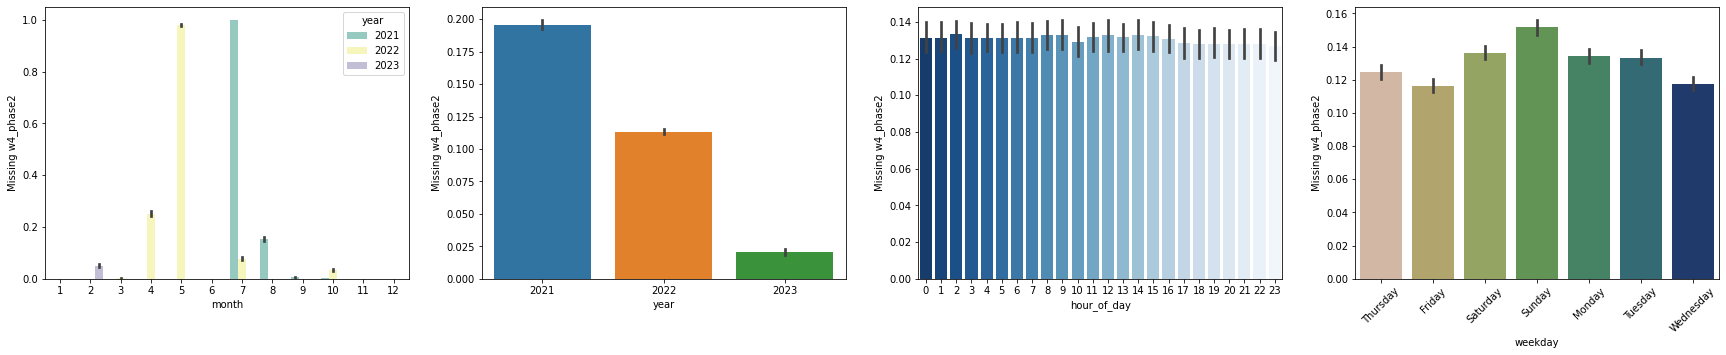

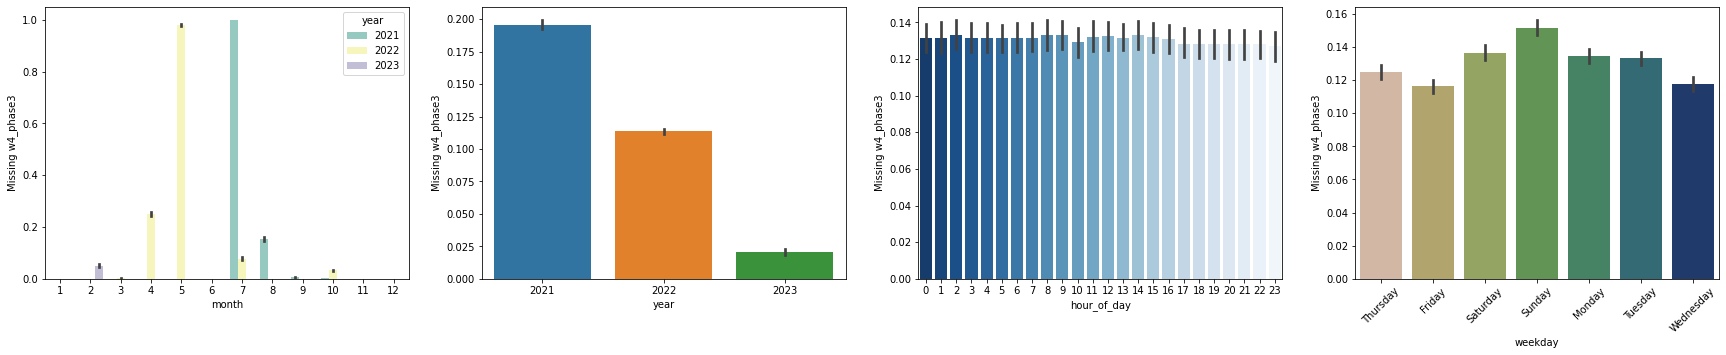

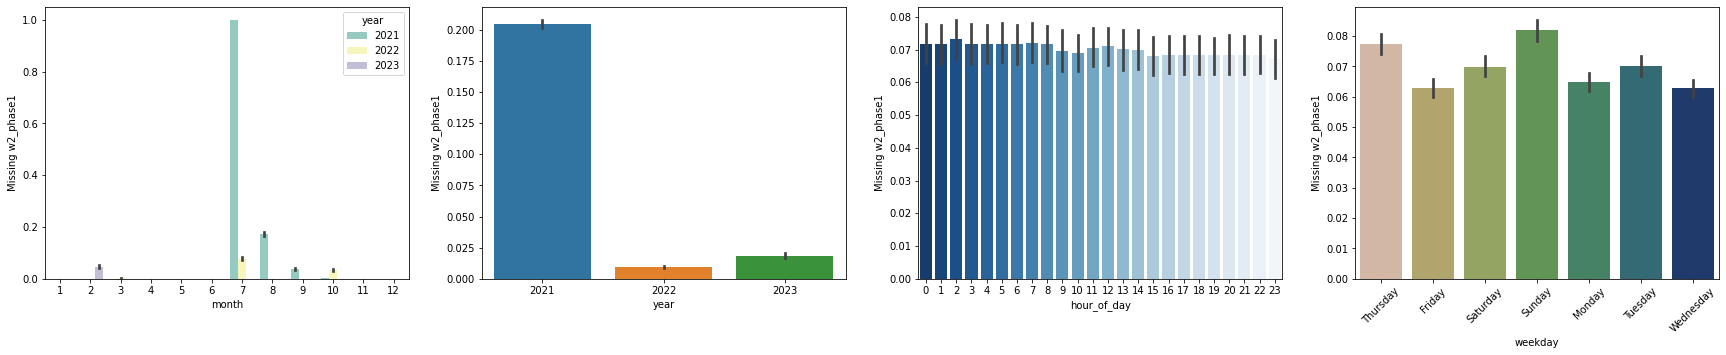

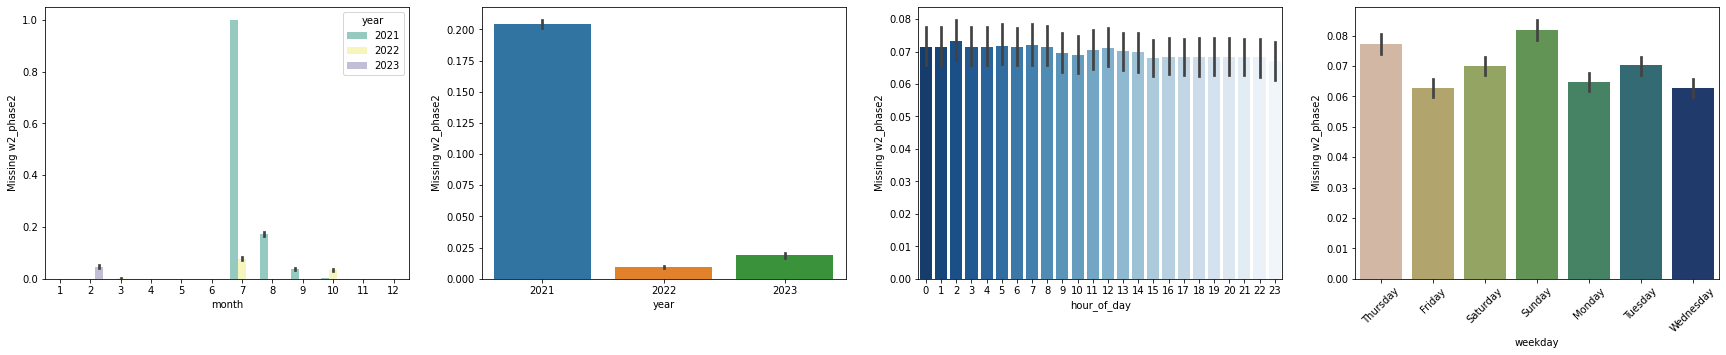

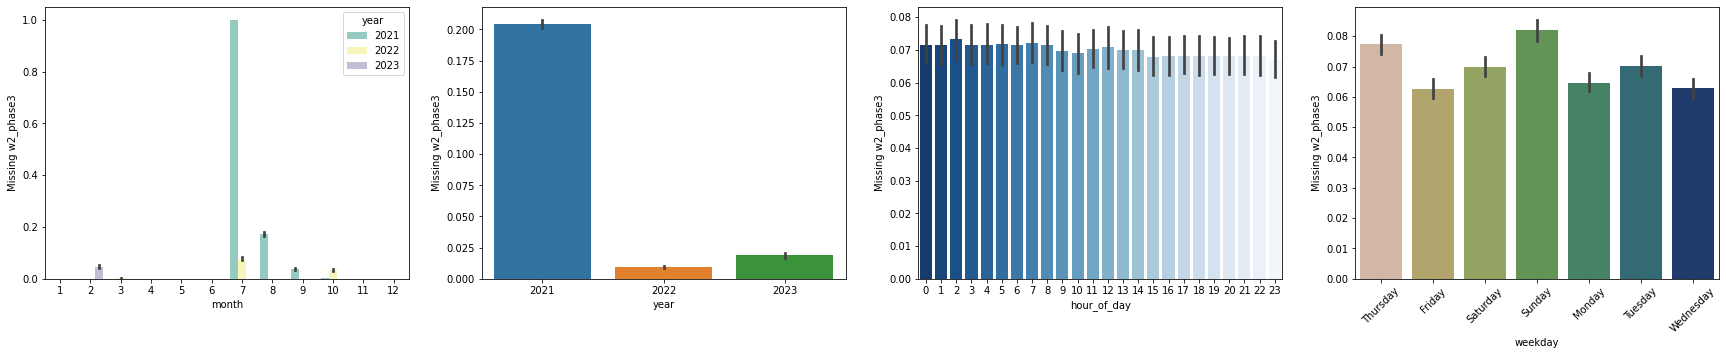

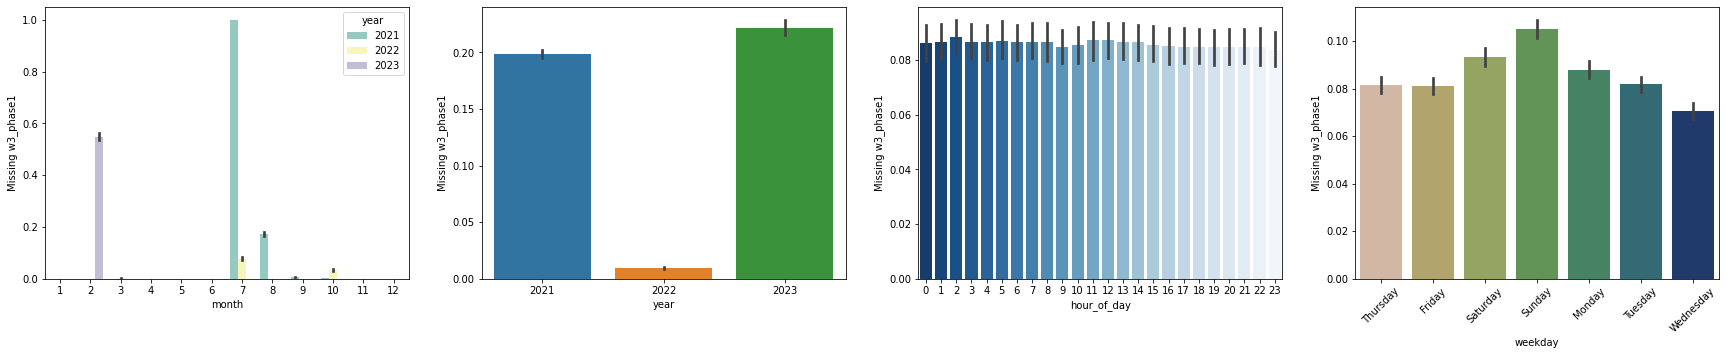

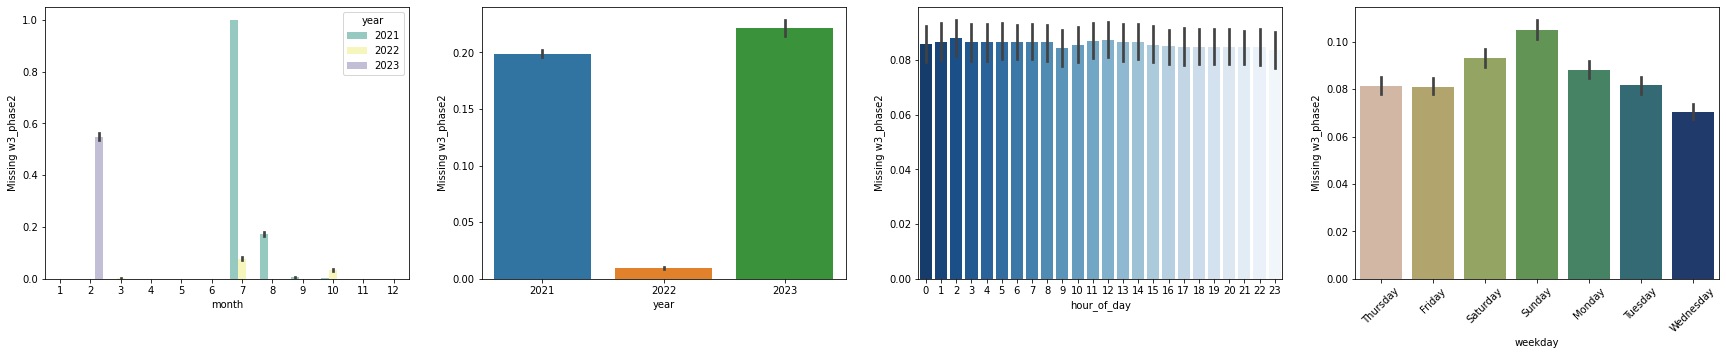

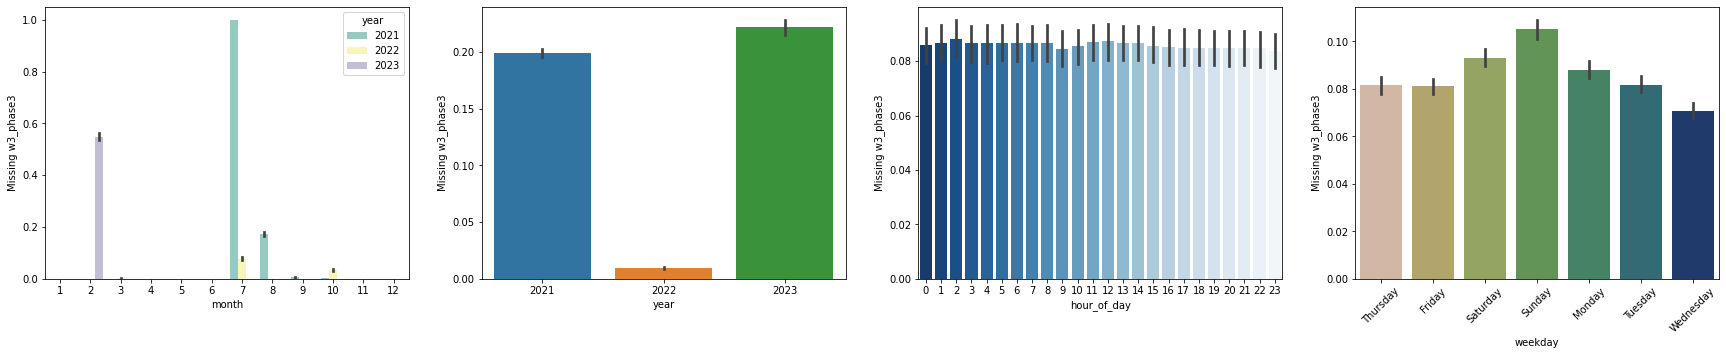

In [28]:
nan_distribution(missing_current)

For current data, from the above barplots, we realize that the majority of missing values comes from 2021. Specifically: 

*  For 2021, 100% of July's and 20% of August's data is missing 
*  For 2022, 100% of W4's data for May and 25% of April is missing, while about 8% of July's data is missing for all the meters.
* For 2023, a lot of values of the smart meter connected to the battery (W3)are missing 
* Lastly, we see a slightly increased percentage of missing values during the weekends.




###For Voltage Data


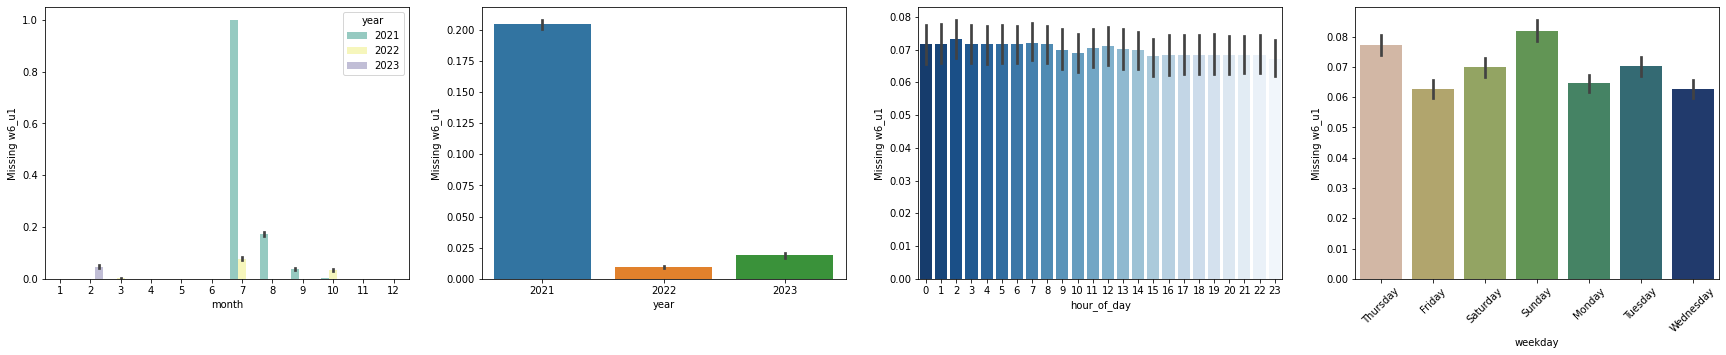

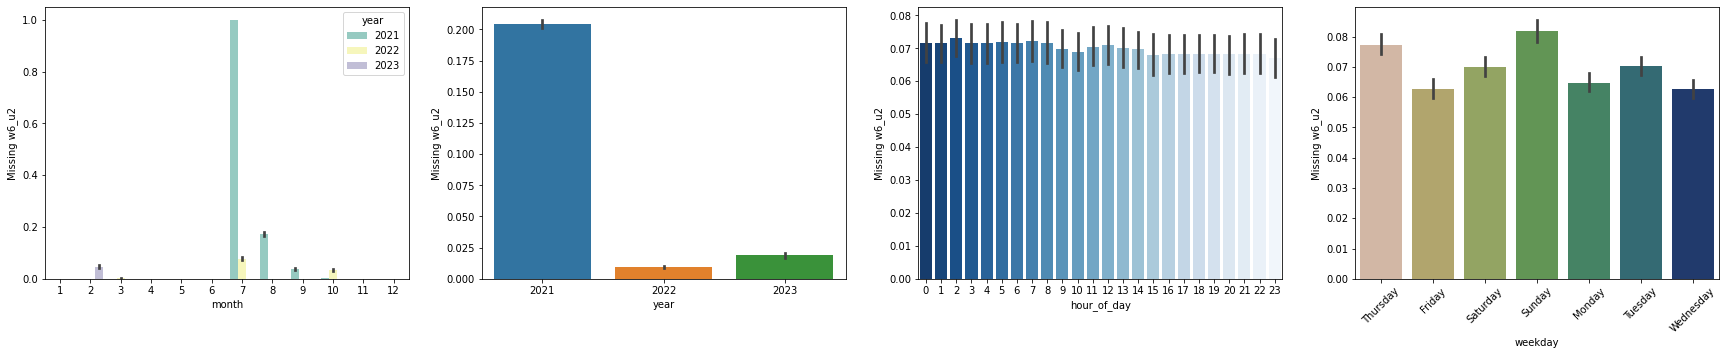

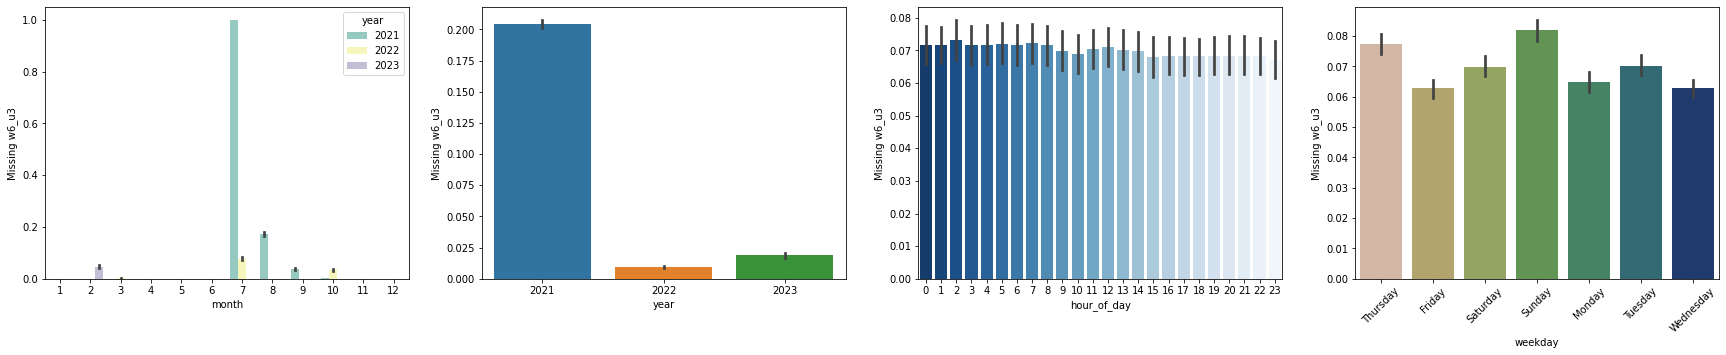

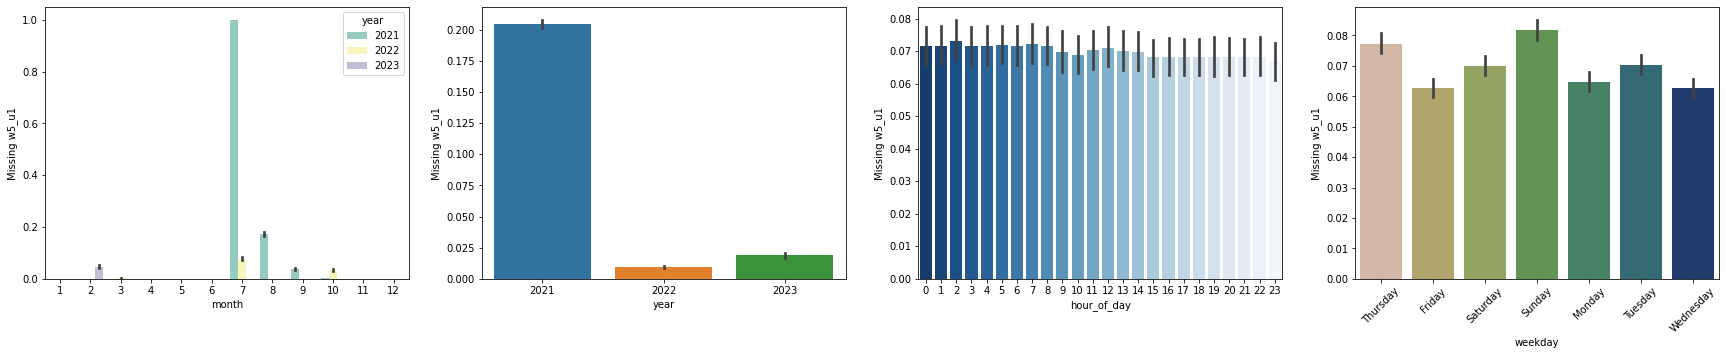

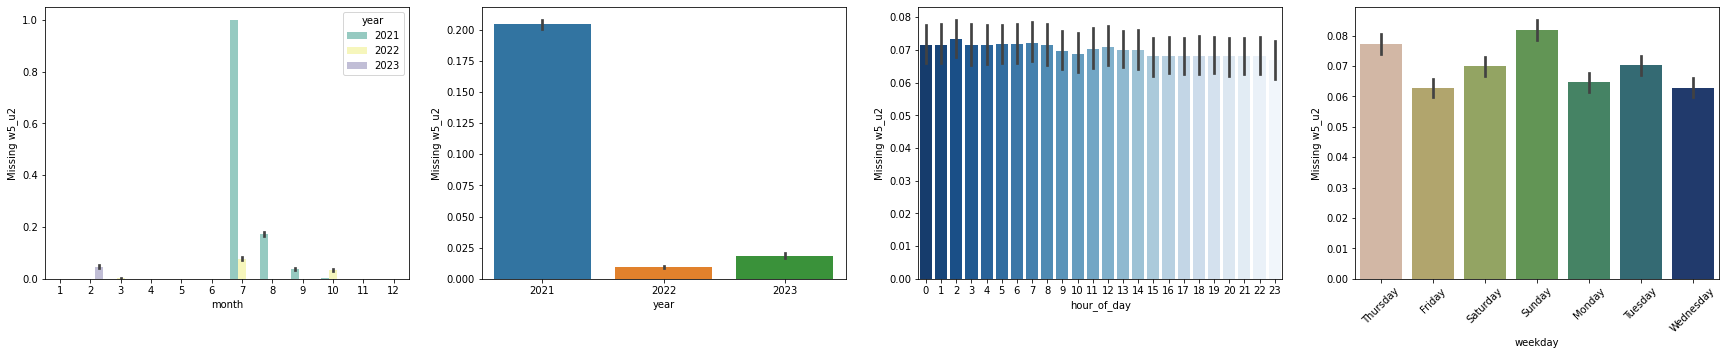

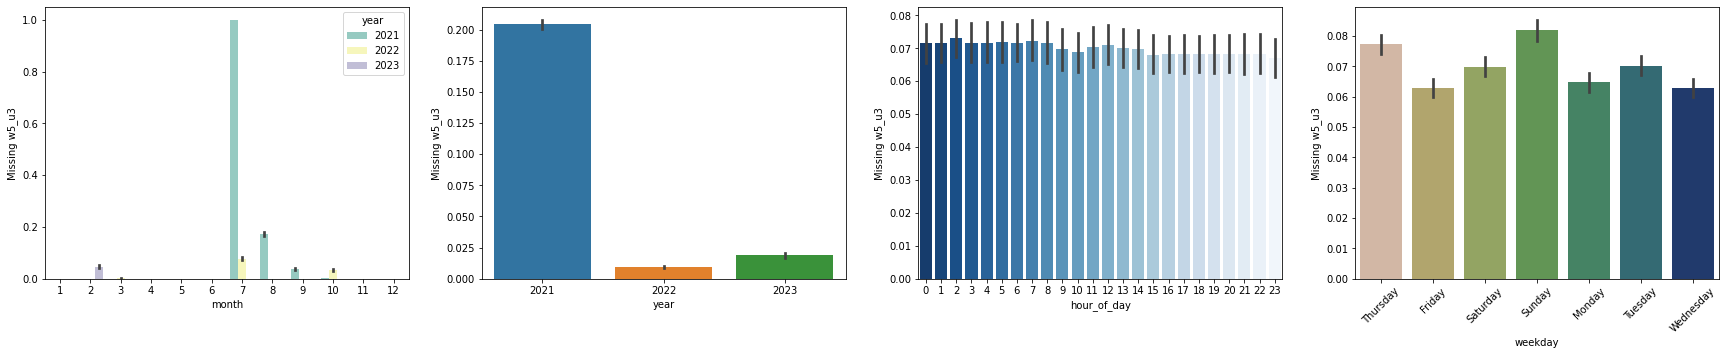

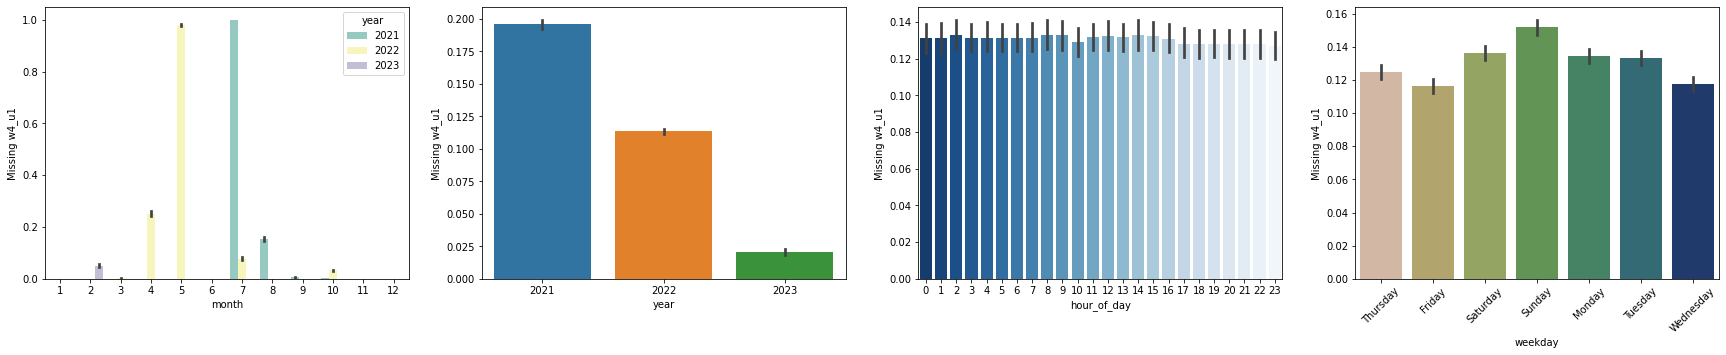

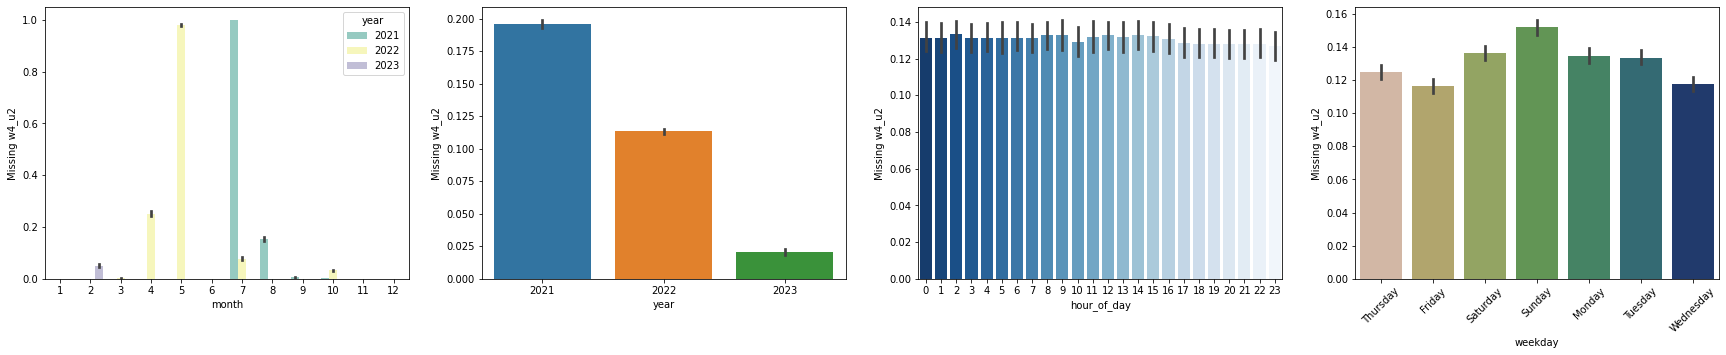

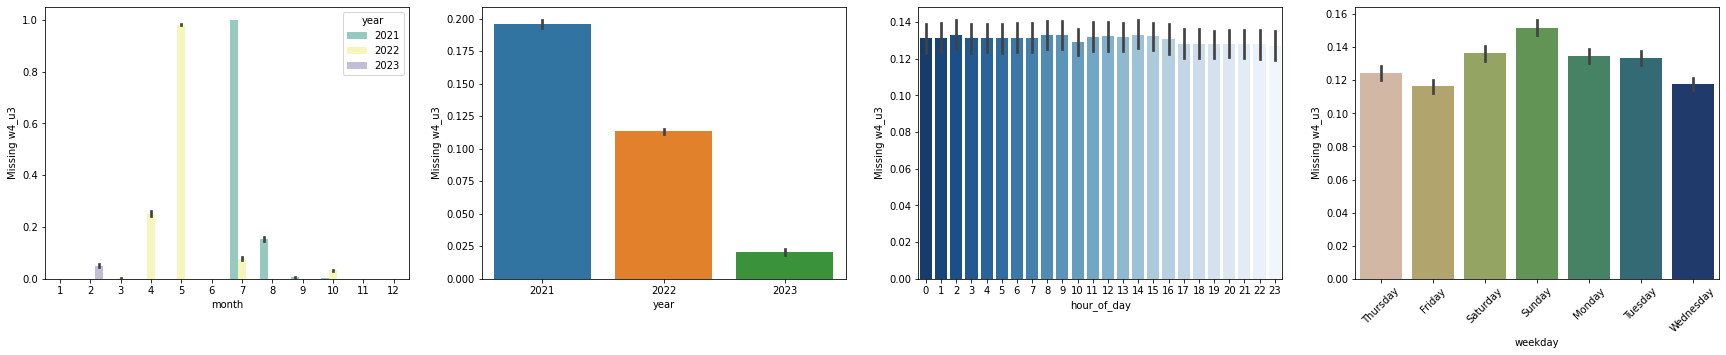

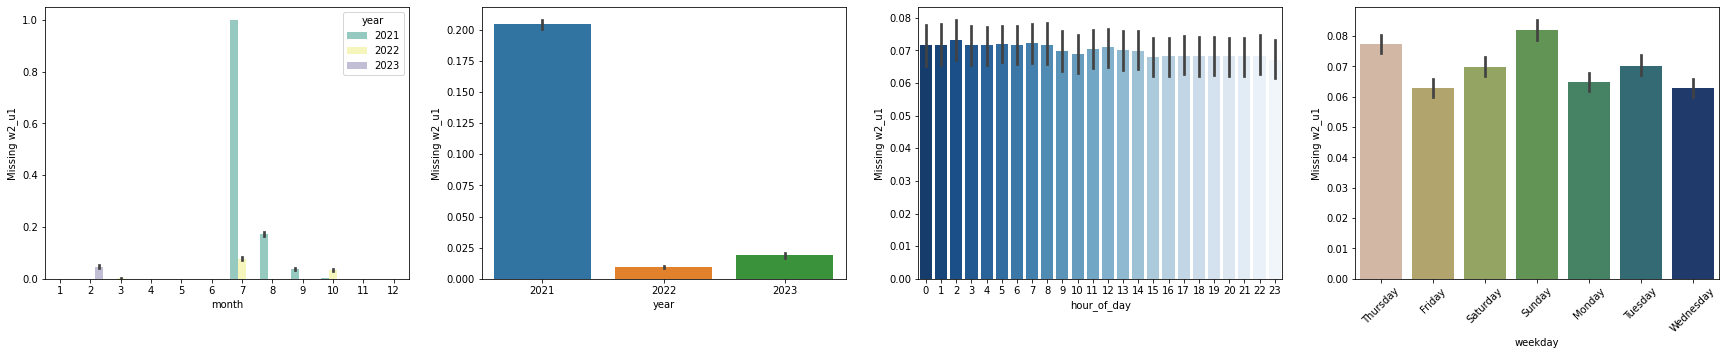

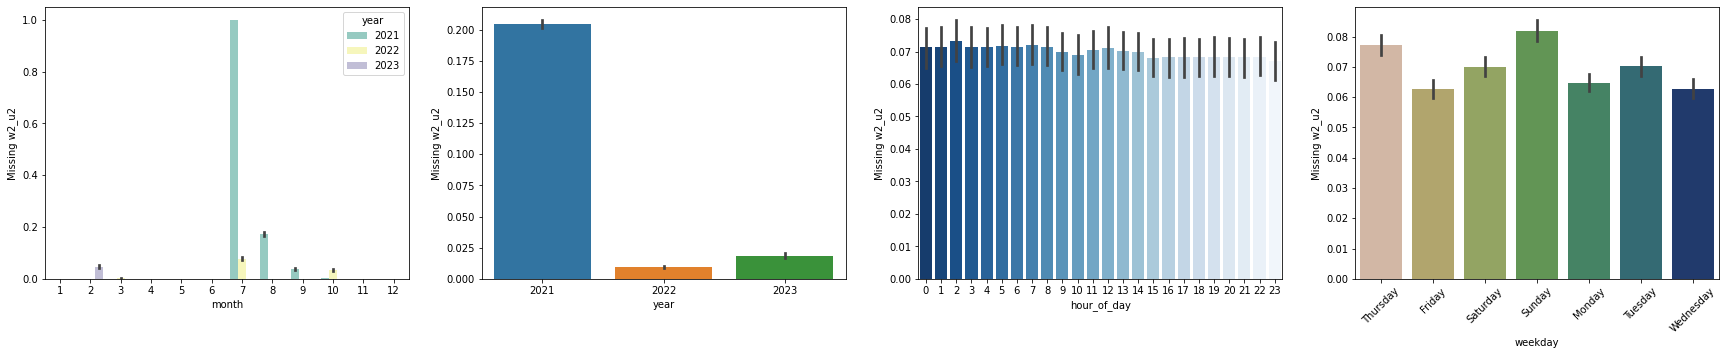

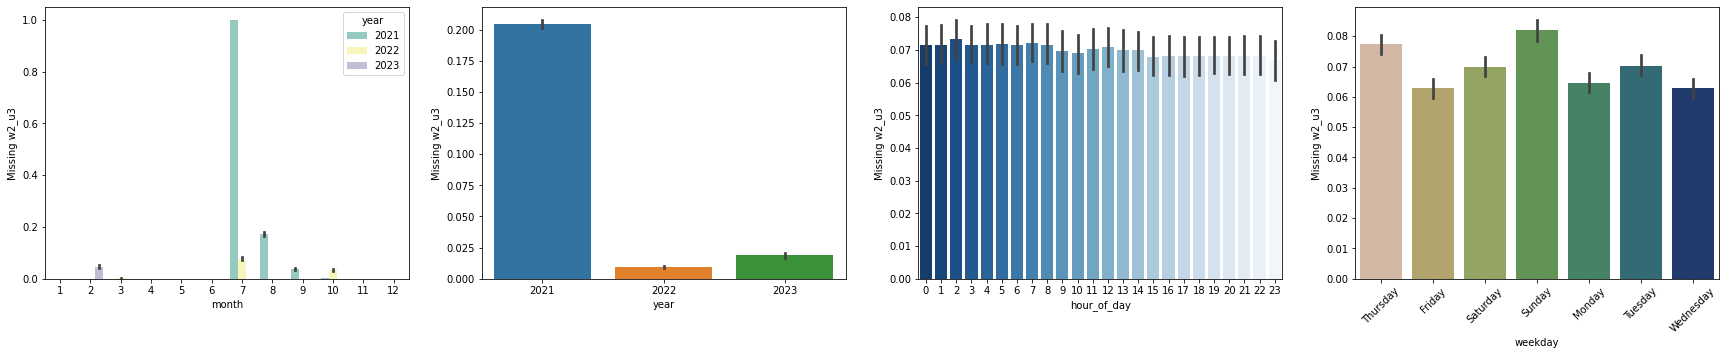

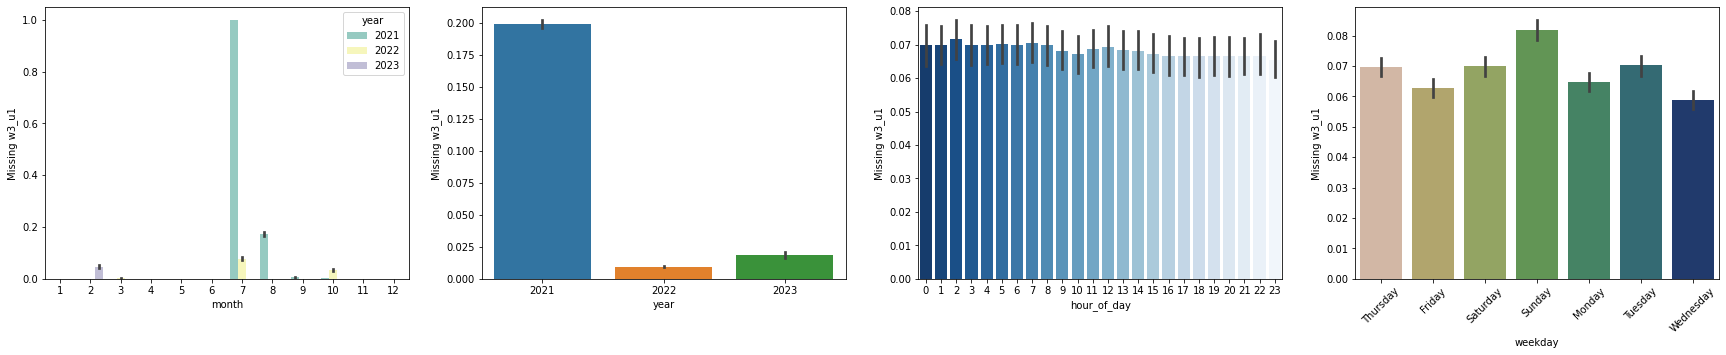

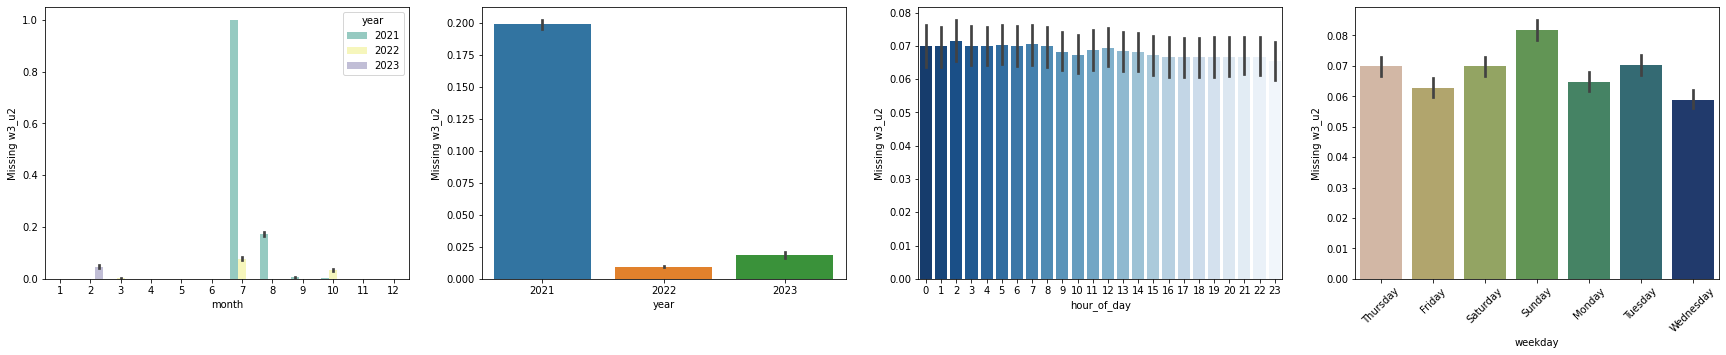

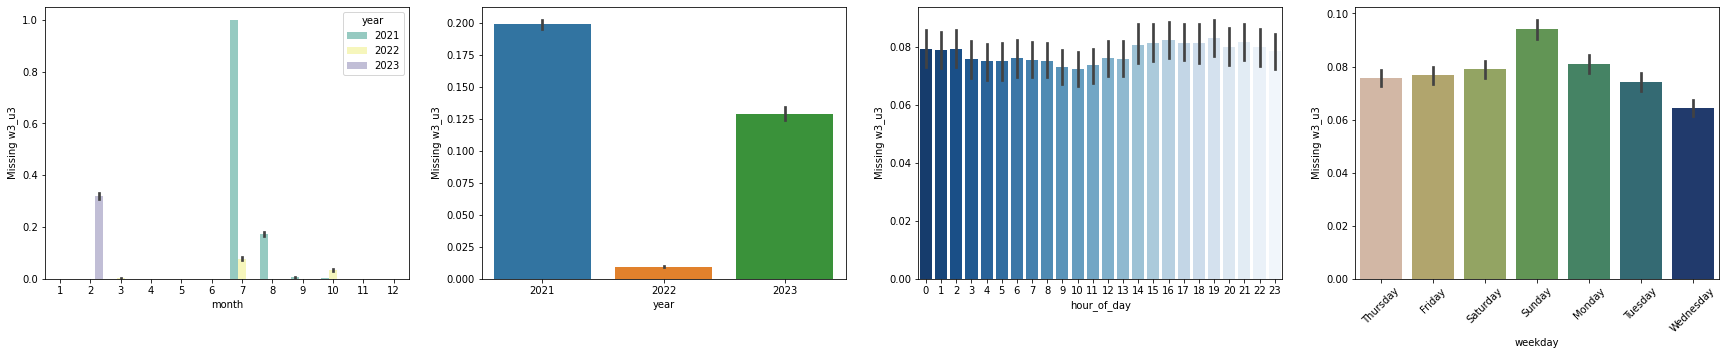

In [29]:
nan_distribution(missing_voltage)

We see that the missing values are distributed in a similar way as the current data

###Conclusions

From the above barplots for Nan values we have a good understanding of how nan values are distributed. As we realized, almost 100% of July 2021 is missing. So reindexing our dfs from 2021-07-01 was probably not the best solution. We are going to drop July 2021 completely and begin our data from 2021-08-01. Moreover, as our data are not being updated that fast, we will adjust our end date to current date minus 5 days, so are assuming that we have not taken data for the last 5 days

##Reindexing to keep a selected range of dates

we are going to apply again the select_range function for all of our datasets with the new range of index applied

In [207]:
power_dt=select_range(power_dt)
current_dt=select_range(current_dt)
voltage_dt=select_range(voltage_dt)

And now we are going to check again nans distribution

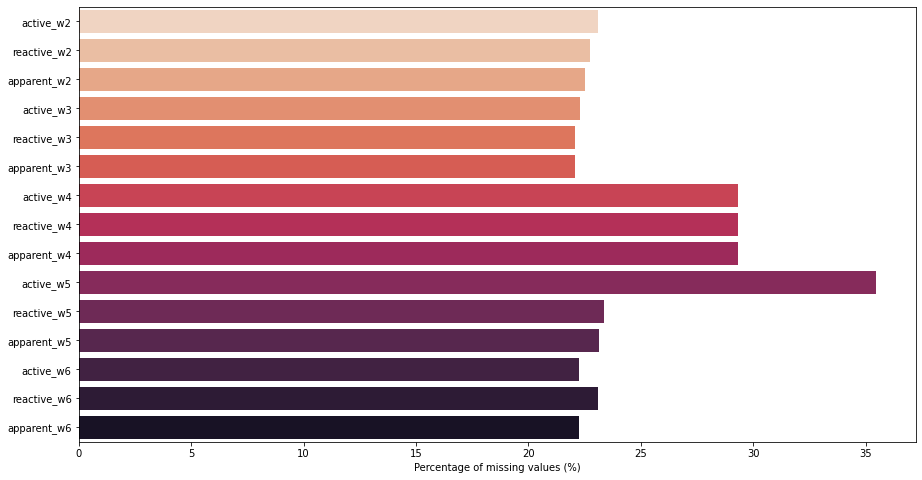

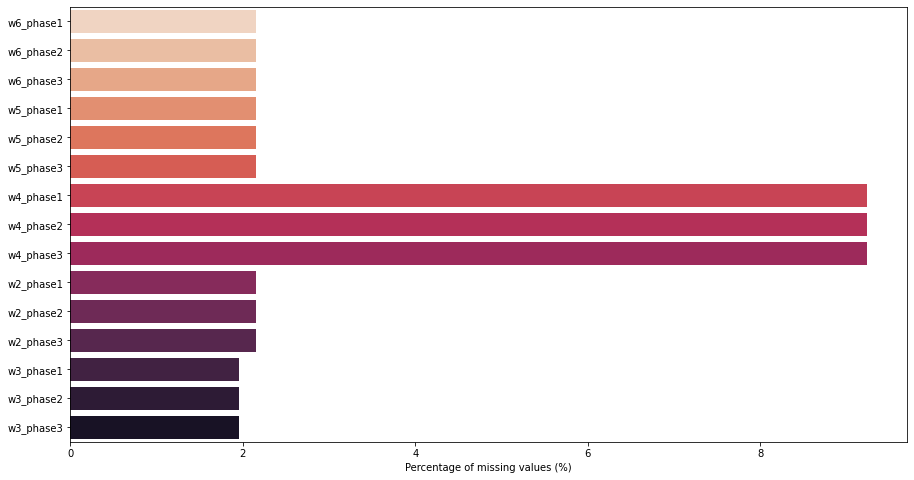

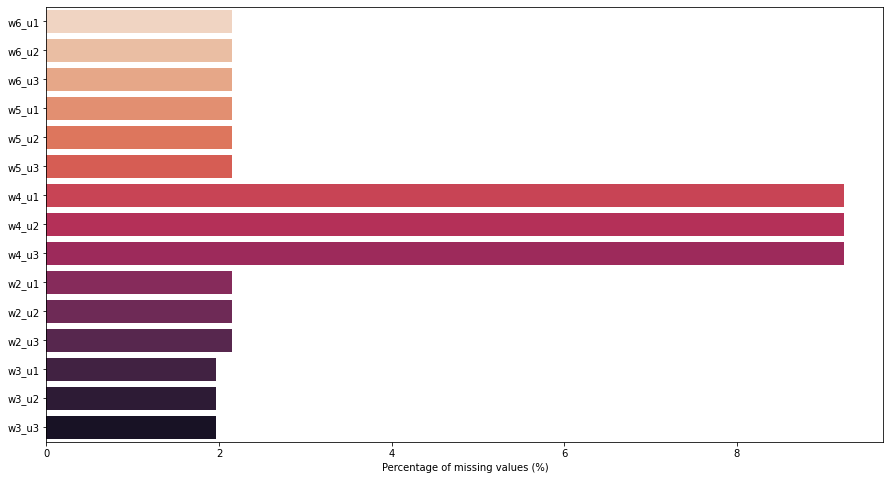

In [208]:
nan_percentage(power_dt)
nan_percentage(current_dt)
nan_percentage(voltage_dt)

##General Conclusions







From the above barplots we understand that :

**Voltage and Current Data **
* There is a 10% of missing values for the connected at the headquarter loads meter
* There is about 2% of missing values for the rest of the meters

For **Power data:**
* We are missing 35% of the fast charging station's data, 30% of the headquarter loads and about 22% of every other meter.



#Checking our values distribution to have a better understanding of how each meter works


##Plotting raw data

We will plot three days from the power data to see how the values are distributed for each df



###Power Data


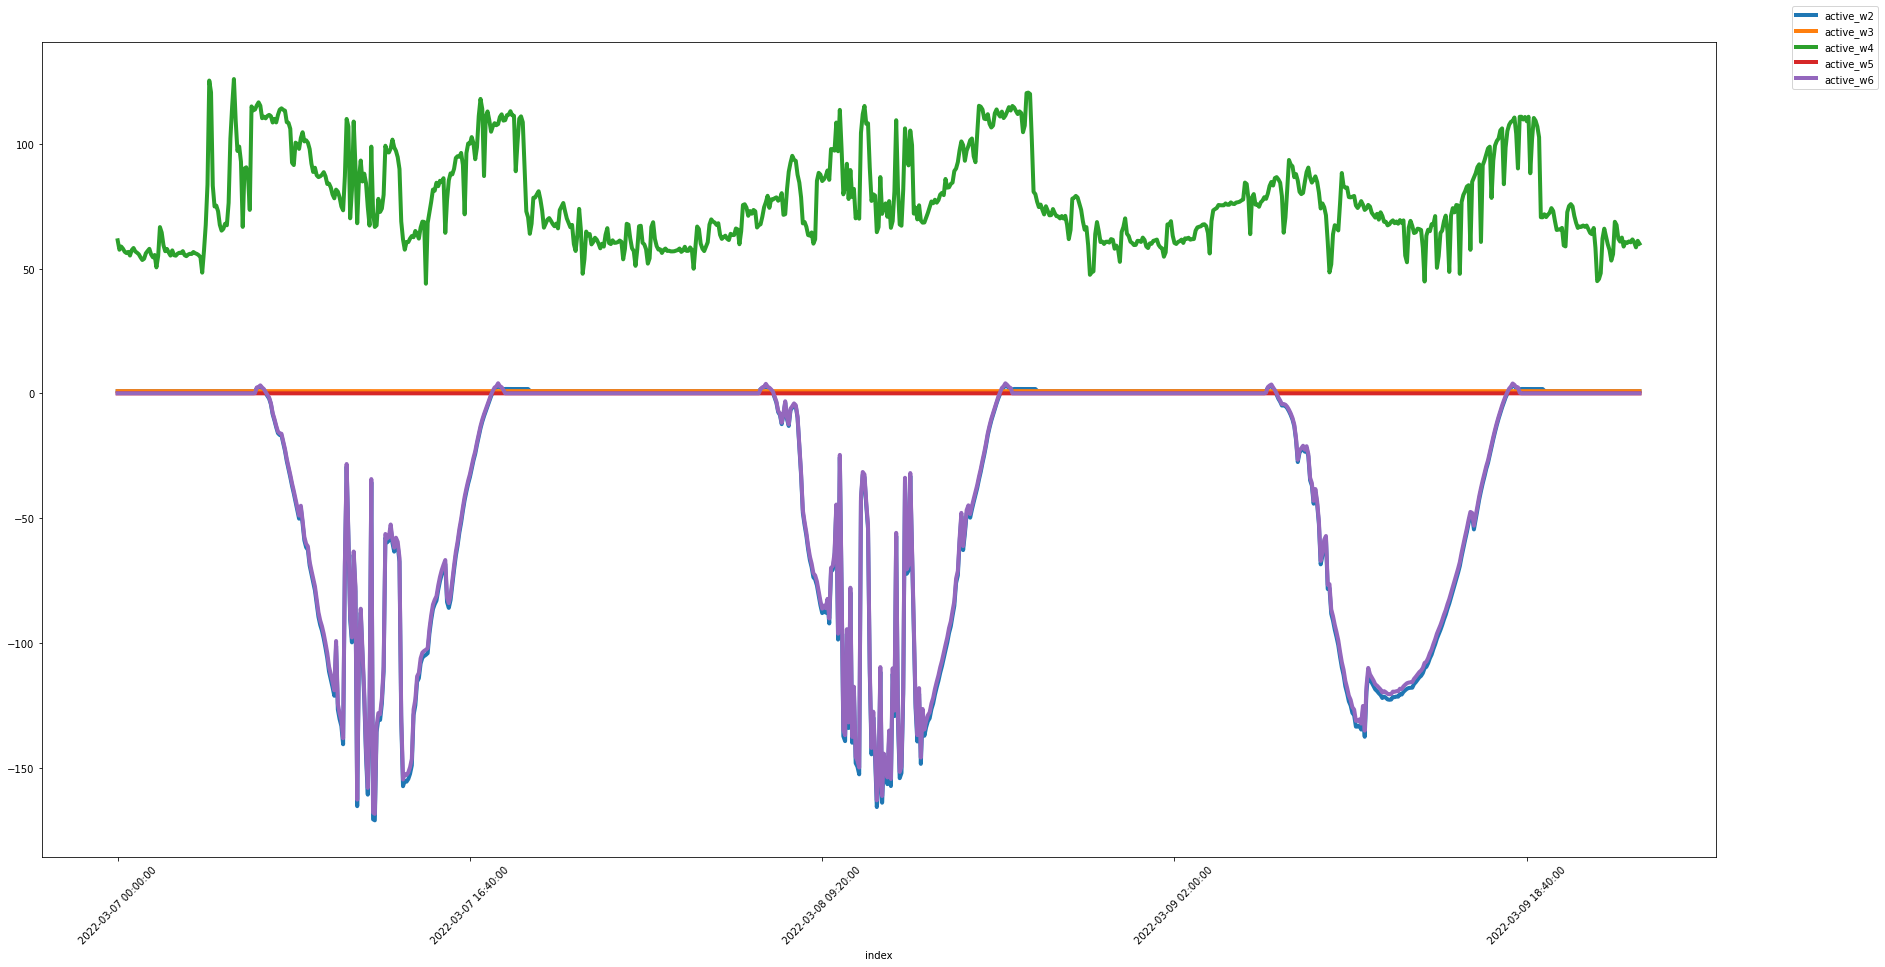

In [260]:
create_power_plots(power_dt,'2022-03-07 00:00:00','2022-03-10 00:00:00')

We see that the power measured by W2 and the power measured by W6(pv's power) are almost the same. Moreover the battery and the fast charging station don't see to properly work as their active power values are almost zero

### Voltage data


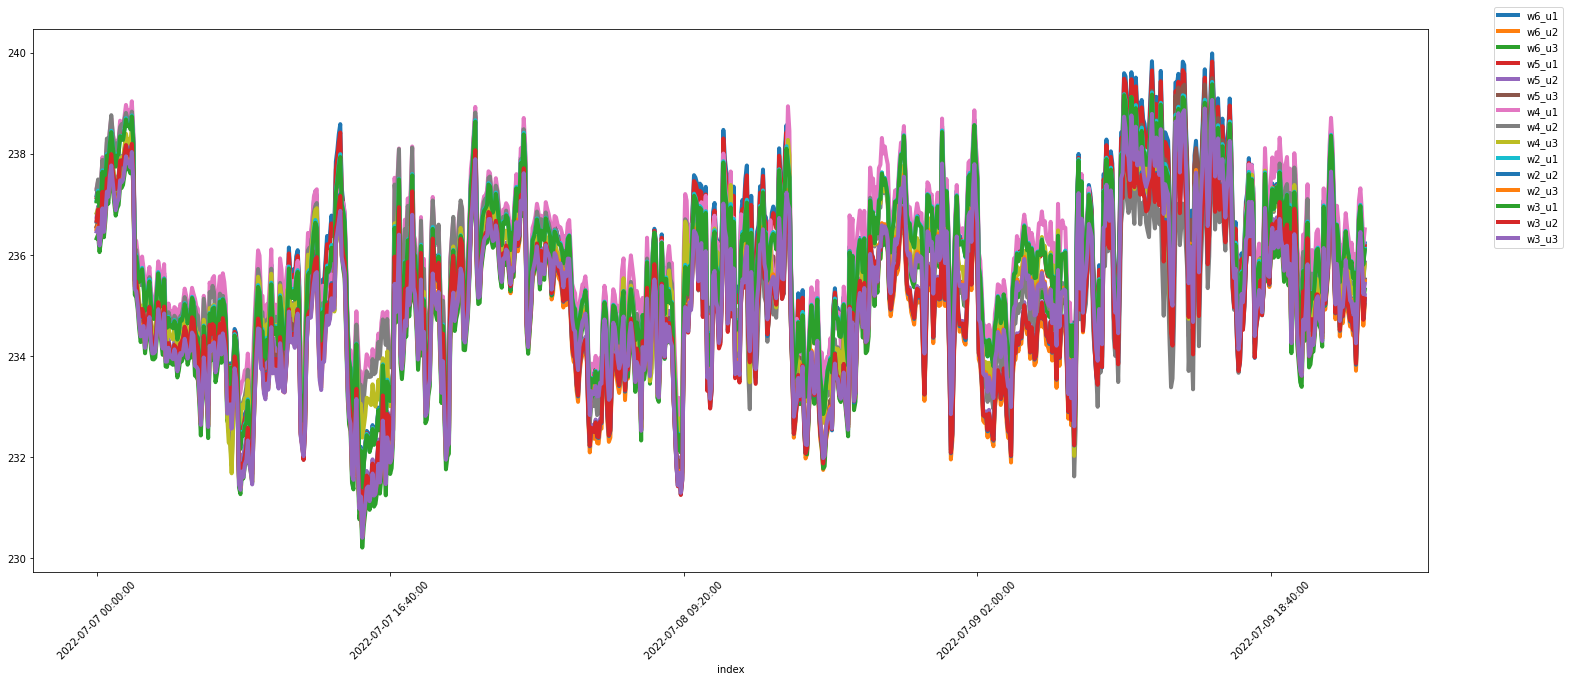

In [261]:
create_plots(voltage_dt,'2022-07-07 00:00:00','2022-07-10 00:00:00')

All of the voltage data vary from 230 V to 239 V

###Current Data


For Current data we will use the describe() function to get some info about the mean, min, max.. etc value of the df.

In [ ]:
current_dt.describe()

w6_phase1      w6_phase2      w6_phase3      w5_phase1  \
count  143399.000000  143399.000000  143399.000000  143397.000000   
mean       43.263105      40.732235      42.623571       1.370773   
std        59.664154      58.038249      58.090832       0.013997   
min         0.698508       0.753097       0.782592       1.060104   
25%         0.747188       0.845360       0.920542       1.362429   
50%        19.790304      11.915084      20.294592       1.369781   
75%        66.708890      62.272548      65.234200       1.377499   
max       297.807040     292.804100     291.888670       1.576433   

           w5_phase2      w5_phase3      w4_phase1      w4_phase2  \
count  143397.000000  143397.000000  132921.000000  132921.000000   
mean        1.298402       1.295960      82.959952      76.976383   
std         0.014143       0.012419      29.176967      27.629023   
min         0.998044       1.003483       0.000000       0.000000   
25%         1.290847       1.288282      65.072100      59.746716   
50%         1.297359       1.295228      77.798500      72.304810   
75%         1.304148       1.302300      98.424545      90.545130   
max         1.603926       1.469162     235.961060     228.249940   

           w4_phase3      w2_phase1      w2_phase2      w2_phase3  \
count  132921.000000  143400.000000  143400.000000  143400.000000   
mean       83.638019      43.742671      40.690908      43.095459   
std        32.623781      59.044654      57.557738      57.668770   
min         0.000000       1.459470       1.580210       1.414502   
25%        61.829200       2.503277       1.707044       2.304756   
50%        77.869736      18.409038      10.525562      19.083236   
75%       101.946365      65.887028      61.232490      64.583815   
max       250.437840     298.916630     292.911040     293.360720   

           w3_phase1      w3_phase2      w3_phase3   day_of_month  \
count  143680.000000  143680.000000  143680.000000  146299.000000   
mean        6.611098       5.477087       5.536951      15.533278   
std         0.076237       0.064309       0.076712       8.753572   
min         6.184863       5.118694       5.083643       1.000000   
25%         6.558821       5.433234       5.484585       8.000000   
50%         6.611235       5.477139       5.536449      15.000000   
75%         6.663691       5.521866       5.589006      23.000000   
max         6.919477       5.732128       5.896445      31.000000   

               month    hour_of_day           year  
count  146299.000000  146299.000000  146299.000000  
mean        7.464412      11.499607    2021.698809  
std         3.363257       6.922002       0.458777  
min         1.000000       0.000000    2021.000000  
25%         5.000000       5.000000    2021.000000  
50%         8.000000      11.000000    2022.000000  
75%        10.000000      17.000000    2022.000000  
max        12.000000      23.000000    2022.000000

As we see the fast charging station and the battery have very low current, close to zero, which is logical given that their power is also close to zero.
The 75% of thecurrent from headquarter loads varies from 65 - 235 mA (?), while the pv's and w2's currents are behaved similarly, with 25% of their value being close to zero, probably these values correspond to the values measured during the night, and the rest 75% vary from 19 - 299 mA. 

#Power Factor

We are going to create a new column for each meter that it will contain the power factor of each meter. As pf = Active Power / Apparent Power, we are going to divide the relevant columns for each meter and creating a copy of our power df with the added column


In [166]:
power = power_dt.copy()

In [167]:
power['power_factor_w2'] = power['active_w2']/abs(power['apparent_w2'])
power['power_factor_w3'] = power['active_w3']/abs(power['apparent_w3'])
power['power_factor_w4'] = power['active_w4']/abs(power['apparent_w4'])
power['power_factor_w5'] = power['active_w5']/abs(power['apparent_w5'])
power['power_factor_w6'] = power['active_w6']/abs(power['apparent_w6'])

###Plotting the power factor of each meter

####For the Photovoltaic (w6)


For the meter connected to the PV, we expect the power factor to vary from a high to almost zero value, with a period of one day, as during the day the pv generates power while the night it doesn't.

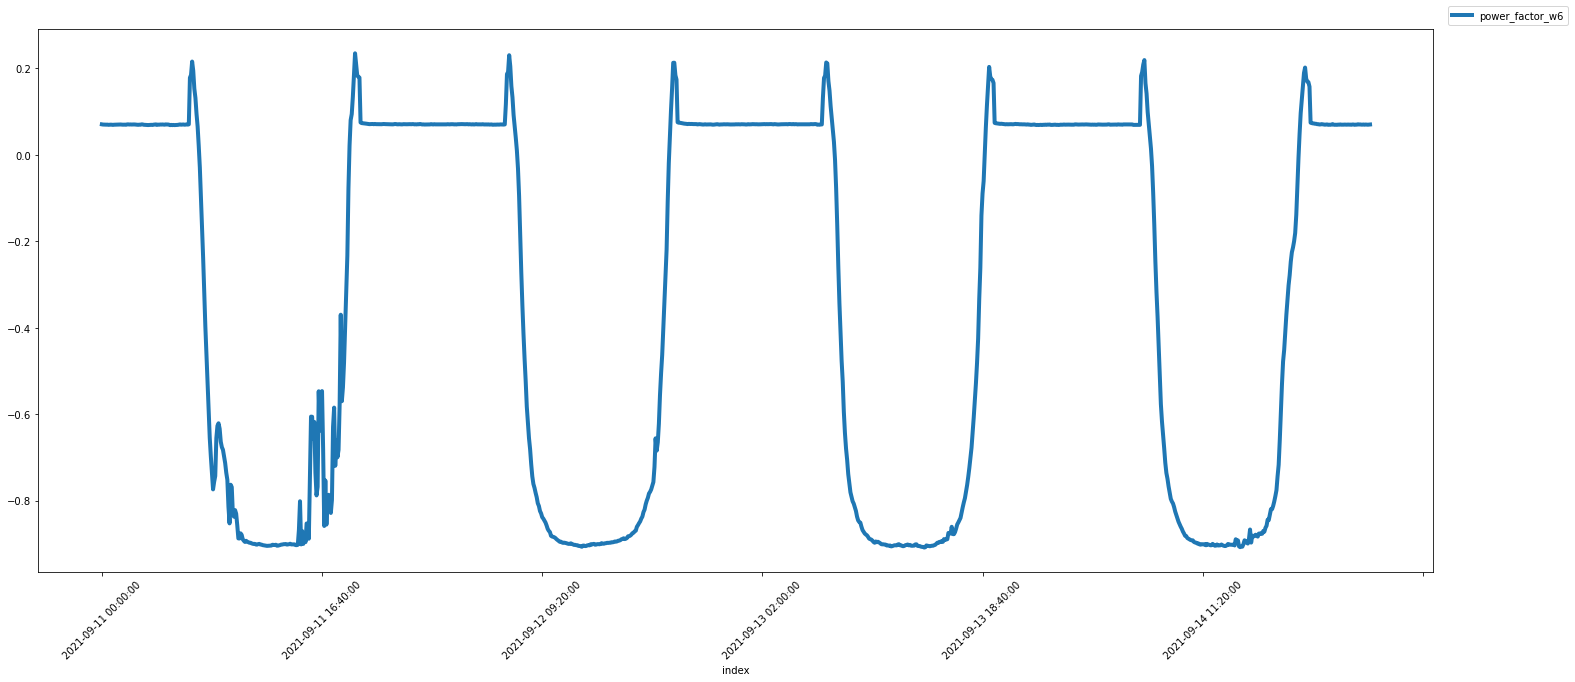

In [267]:
create_plots(power,'2021-09-11 00:00:00','2021-09-15 00:00:00','power_factor_w6')


####For the headquarter loads

For the meter connected to the headquarter loads we expect a high positive power factor, ideally one, as there the losses should be eliminated.

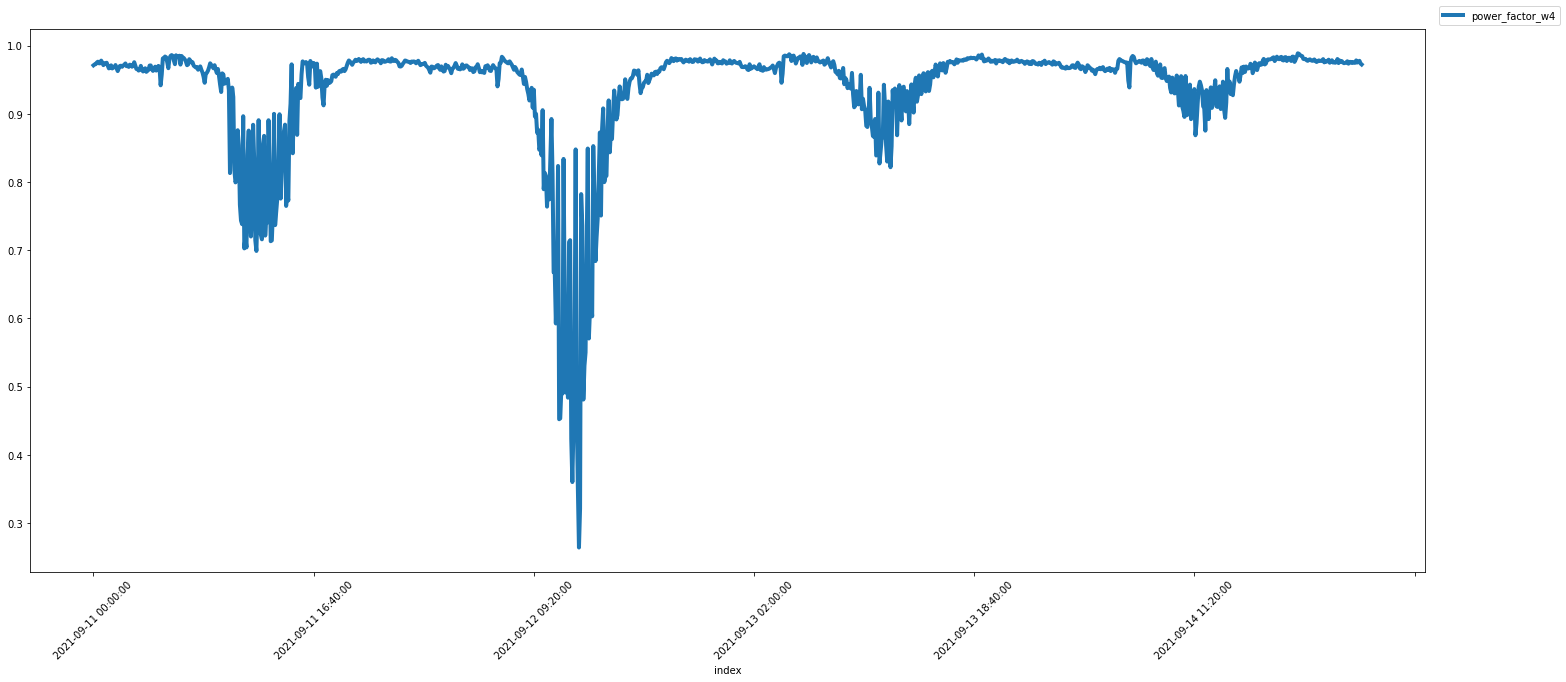

In [276]:
create_plots(power,'2021-09-11 00:00:00','2021-09-15 00:00:00','power_factor_w4')


We see that the result is as expected, with some sudden unexpected falls.

In [ ]:
##create_hists(power_dt) for histograms, not for now
##create_hists(current_dt)
##create_hists(voltage_dt)

###Using the built-in describe() function 

To get an overall view of the data specs, like min and max values we use the describe() function, in order to detect any abnormalities.


For each meter we check their pf's distribution within the hours of the day and the weekdays, as well their min/max values.

#### For Headquarter Loads (W4)


In [283]:
power['power_factor_w4'].describe()

count    104391.000000
mean          0.938737
std           0.152401
min          -0.865840
25%           0.950747
50%           0.973345
75%           0.983926
max           0.997234
Name: power_factor_w4, dtype: float64

From the df's metrics taken from .describe, we understand the following regarding W4:
* it has a min value of -0.865840
* at least 75% of its values is between 0.950747 and 0.997234.


##### Checking Negative values

Regarding the negative values we will create the followint barplots/ countplots to help undestand when this negative pf occurs.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1 % of power_factor_w4 is negative


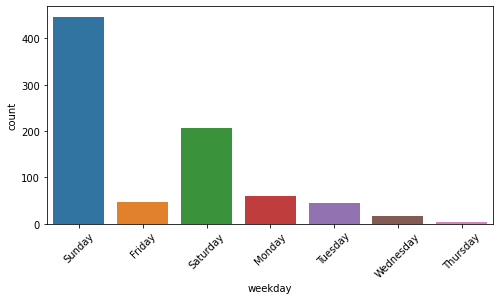

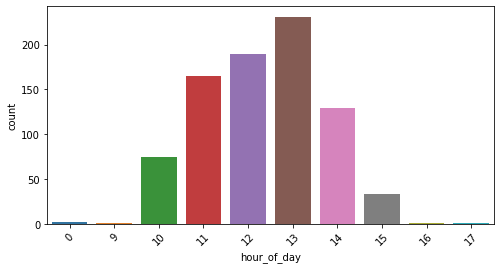

In [146]:
create_countplots_for_negative_pf(power_dt,'power_factor_w4')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


67 % of power_factor_w4 is positive


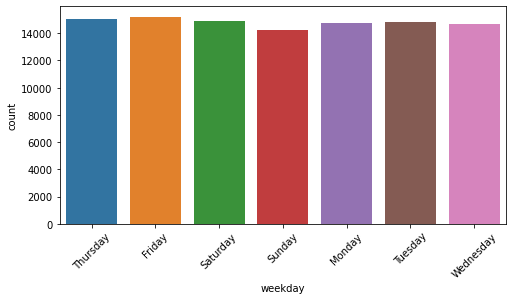

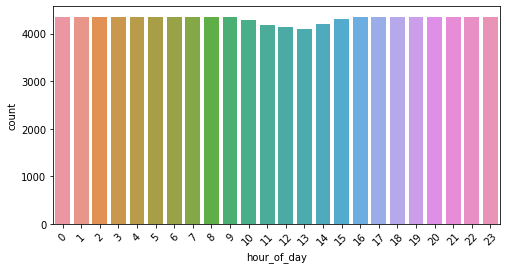

In [147]:
create_countplots_for_positive_pf(power_dt,'power_factor_w4')

We see that 1% of all the power factor values for w4 is negative and that it also occurs mostly at weekends, from 10:00 to 15:00. We understand that these values may have been occured due to measuring errors


#### For W2

In [284]:
power['power_factor_w2'].describe()

count    113550.000000
mean         -0.016519
std           0.646608
min          -0.931427
25%          -0.806719
50%           0.201700
75%           0.561987
max           1.244387
Name: power_factor_w2, dtype: float64

Regarding W2 from the above details we understand that: 

*  It has a min value of -0.931427, or a highest absolute value of 0.931427.
*   25% of its power factor's values is between -0.93 and -0.80
*   It has a max value of 1.244387, which is practically impossible as power factor is a cosine and it takes values from -1 to 1. We will check when these >1 values occur. We assume that these measurements were wrong and we will drop them. 



#Finding correlations between the variables

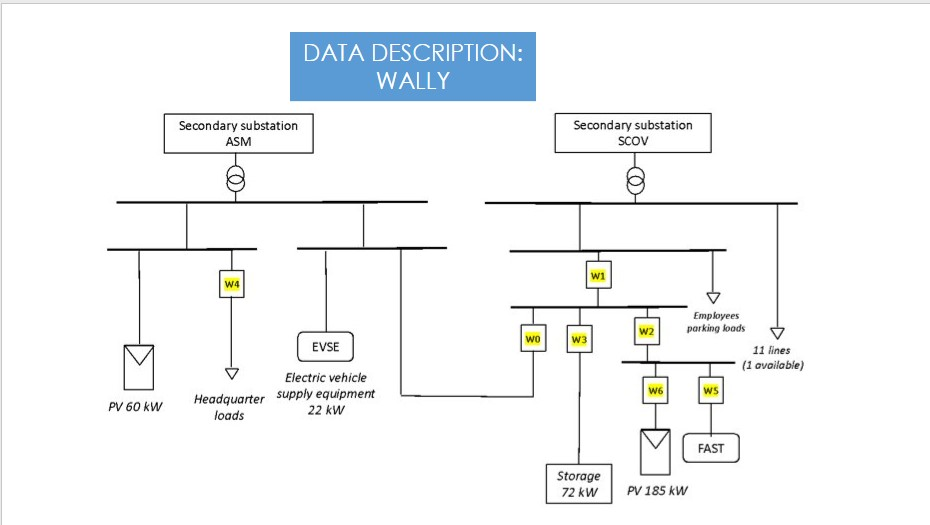

###At first we are going to explore separately the power, current and voltage data and then alltogether, searching for correlations between the different components of each meter

###creating a correlation matrix for each dataframe ( power/current/voltage) to see which variables are negative or positive correlated.

##Correlations between power Data

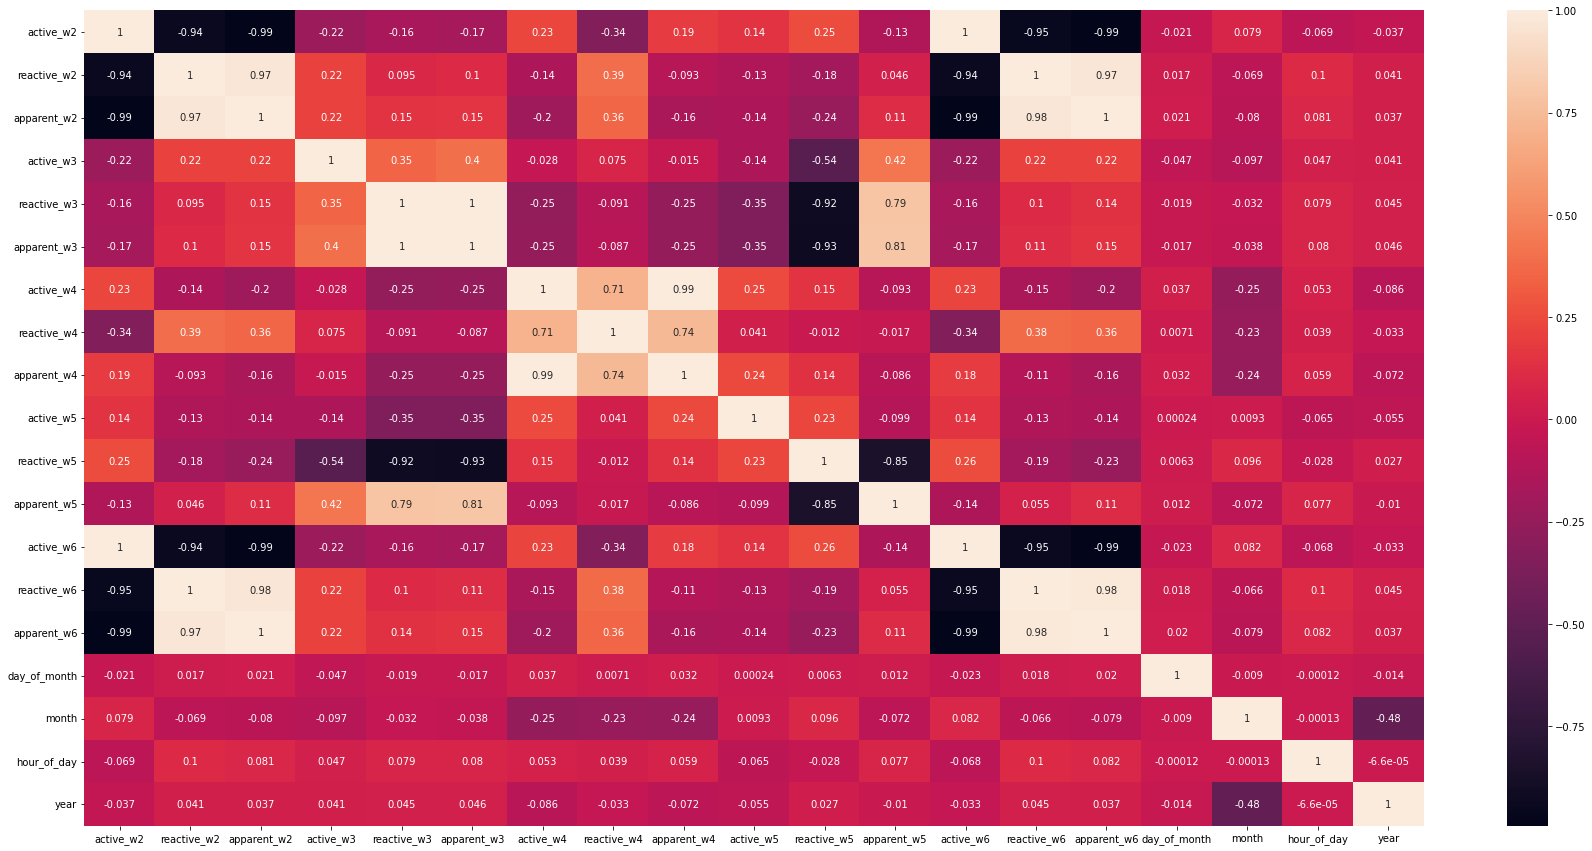

In [186]:
create_correlation_mtrx(power_dt)

####From the above matrix we see that: 

####1. There is strong correlation between the power of the meter at the PV (W6) and the W2 meter. As wee see from the data description W2=W5+W6 and from the earlier analysis we found that the fast charging station which is connected to W5 meter is barely working, as its active and reactive power is almost zero. So their strong correlation was anticipated.
####2. The reactive power of W5 meter is negative corrrelated to battery's reactive and apparent power (W3)



##Correlations between voltage data


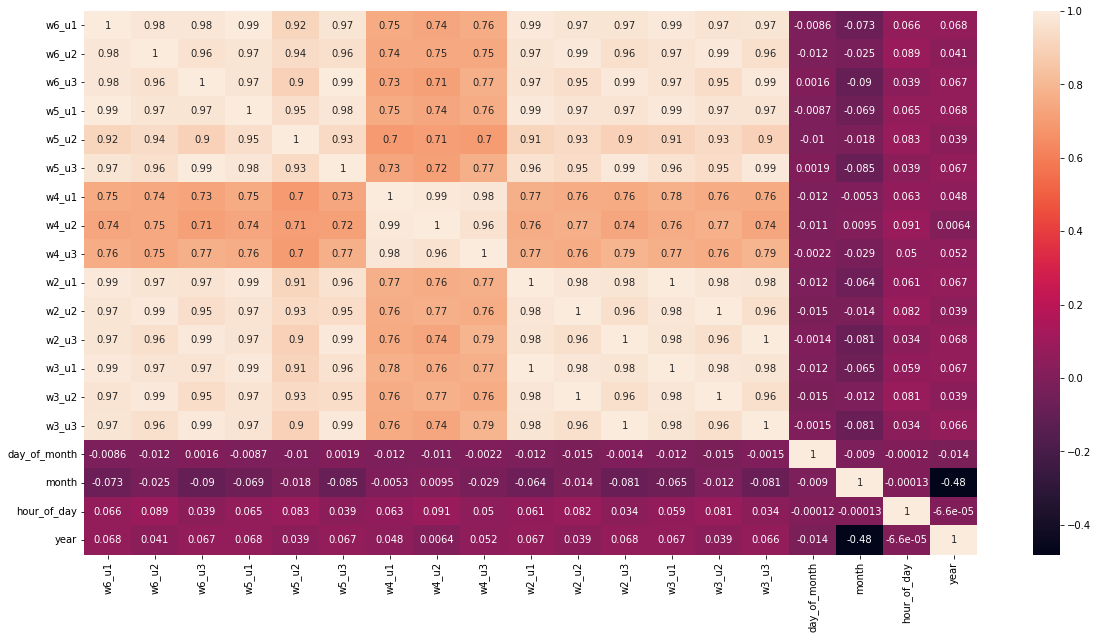

In [180]:
create_correlation_mtrx(voltage_dt)

####We notice that there is a strong positive correlation between all of the voltage phases of the meters. A less stronge correlation is noticed between the phasic voltage of the meter connected to the headquuarter loads ( w4) and every other meter. Lastly absolute positive correlation (1) is observed between the phasic voltages of the battery (w3) and W2 meter.

####As we saw that all phasic voltages vary from V to  the strong correlation was expected.

##Correlation between current data

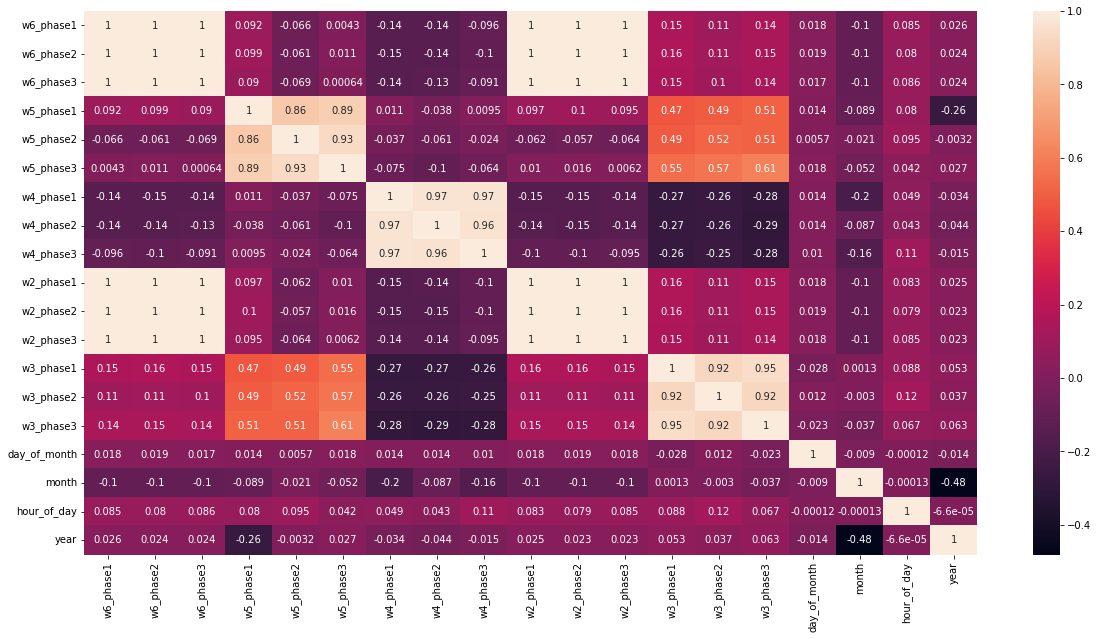

In [181]:
create_correlation_mtrx(current_dt)

####As we see there is absolute positive correlation between the phasic currents of the PV and W2. As explained before this was expected.
####We also notice a positive correlation, of 0.5 approximately, between the current of the battery and the fast charging station

##Concatening power, current and voltage dfs into one to view the correlations between them

In [182]:
total = pd.concat([voltage_dt, power_dt],join='inner',axis=1)

In [183]:
total = pd.concat([total, current_dt],join='inner',axis=1)

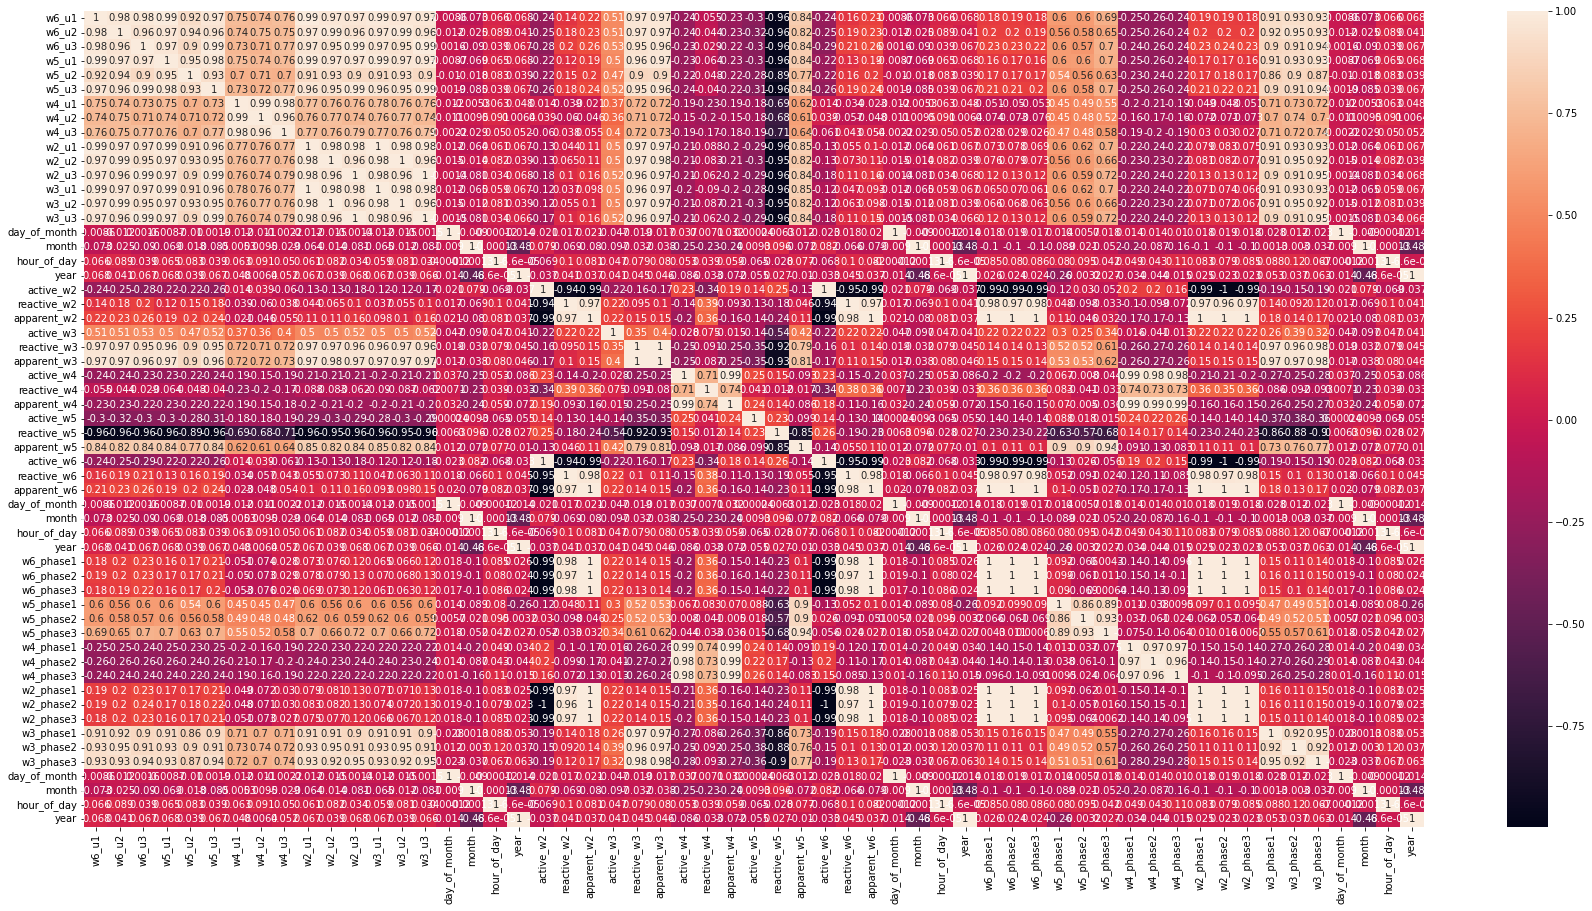

In [187]:
create_correlation_mtrx(total)

###* There is a strong correlation between the phasic voltages of all meters and both voltage and power data of the battery (w3) and the fast charging station (w5)
####* Also strong correlation exists between the current / power of the battery and the power / current of the fast charging station respectively. 
####* Lastly, also correlated are the current/ power of the pv and the power/ current of w2, respectively. 



##Exploring correlations with the weather data, collected at Terni, Italy.

###Since the photovoltaic's performance but also the energy demand, hence the power values measured at the headquarter loads, depend on the weather conditions, it is only logical to explore the correlations between those variables too.
 

Reading the relevant csv, which contains information about the air temperature, the wind speed, the cloucover, the global radiation and the relative humidity.

In [195]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y%m%d%H%M%S')

weather = pd.read_csv("weather.csv", parse_dates=['time [UTC](yyyymmddHHMM)'], date_parser=dateparse, sep = ';')

Setting 'time...' column that contains the datetime information of the measurement, as index

In [196]:
weather=weather.set_index('time [UTC](yyyymmddHHMM)')

####Since the weather data are gathered every one hour and the pv's and headquarter's data are gathered every 5 minutes, we are going to resample the last to 1 hour resolution, so all of the data will be alligned. As the variables we measure are instantaneous, we are going to resample by using the mean value of every hour.

In [202]:
power_pv_resampled=power_dt[['reactive_w6','active_w6','apparent_w6','reactive_w4','active_w4','apparent_w4','day_of_month','month','hour_of_day','year']]
power_pv_resampled.index = pd.to_datetime(power_pv_resampled.index)
power_pv_resampled=power_pv_resampled.resample('60min').mean()


#####Merging the power dataframe and the one containing the weather data into one mutual dataframe, by using the built in function merge, setting the parameter 'how' to 'inner', stating that we want to keep the datetimes that belong to the union of the df's index.

In [203]:
pv_weather = pd.merge(power_pv_resampled, weather, how='inner',left_index=True , right_index=True)

Creating the correlation matrix by calling the relevant custom function 

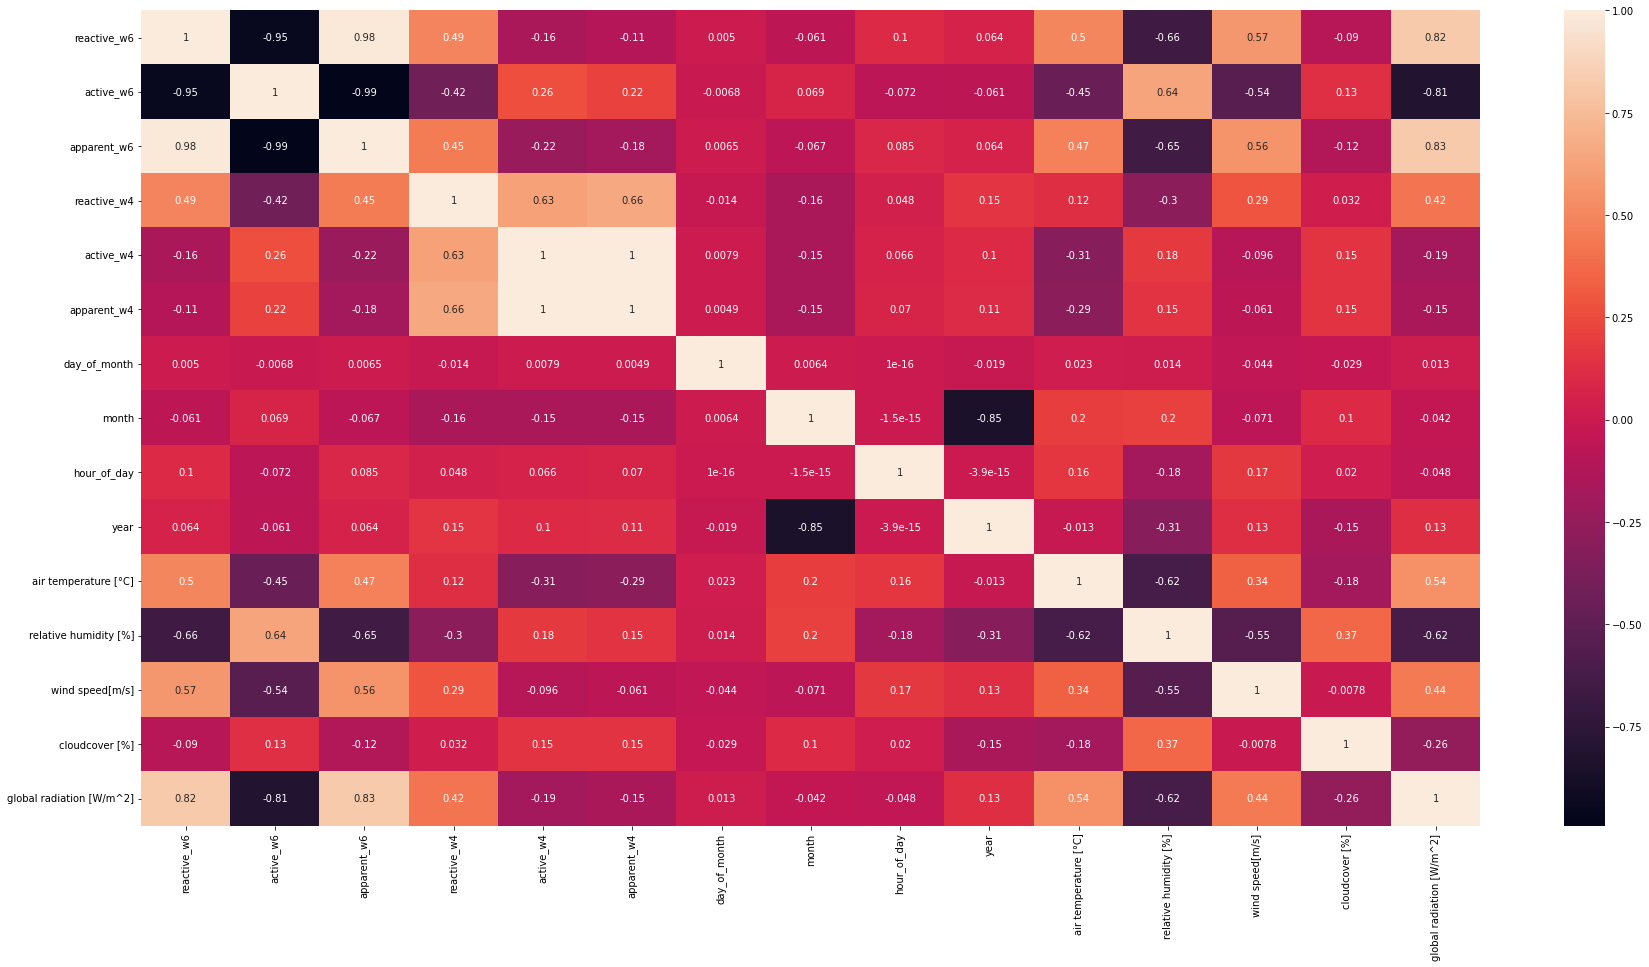

In [204]:
create_correlation_mtrx(pv_weather)

###As expected we see a strong correlation between the global radiation and the photovoltaic's power. Also we notice a medium correlation between wind speed, air temperature and the PV's power. 
###A slightly stronger correlation is seen with the relative humididty, whereas cloudcover is not correlated with the pv's power.